## _Table of Contents 📋_
1. [Importing Libraries](#CH-1)
2. [Data Importing](#CH-2)
    * Data Import
    * Data Viewing
    * Data Quality
        * Handling Duplicate Rows and Columns
        * Missing Values
        * Uniqueness
    * Basic Modeification on DataFrame
    * Data Describing
    * Dataset Description
    * Feature Definition
3. [Exploratory Data Analysis](#CH-3)
    * Categorical Features
    * Numeric Features
4. [Feature Engineering](#CH-4)
    * Train-Test Split
    * Missing Values
    * Outiler Detection and Treatment
    * Feature Transformation
    * Feature Scaling
    * Feature Encoding
5. [Logistic Regression](#CH-5)
    * Building Model + Cross-Validation + Hyperparameter Tuning
    * Evaluation
    * Visualization
6. [K Nearest Neighbor](#CH-6)
    * Building Model + Cross-Validation + Hyperparameter Tuning
    * Evaluation
    * Visualization
7. [Results and Discussion](#CH-7)
    * Comparison
    * Visualizing Model Performance
8. [Way Forward](#CH-8)

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#0093F9;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-1"></a> 
<p style="padding: 10px;
              color:white;">
              1. Importing Libraries 📚
</p>
</div>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy import stats
import pylab

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#0093F9;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-2"></a> 
<p style="padding: 10px;
              color:white;">
              2. Data Import and Auditing 👨‍💻
</p>
</div>

<h2 align="left"><font color='DarkCyan'><u>Data Import</u></font></h2>

In [4]:
# Data Importing from Kaggle
df = pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv",sep = ';')

<h2 align="left"><font color='DarkCyan'><u>Data View</u></font></h2>

In [3]:
# Dimension of DataFrame
df.shape

(41188, 21)

In [4]:
# Data Viewing Initial 10 columns
df.iloc[:5,1:10]

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,services,married,high.school,unknown,no,no,telephone,may,mon
2,services,married,high.school,no,yes,no,telephone,may,mon
3,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,services,married,high.school,no,no,yes,telephone,may,mon


In [5]:
# Data Viewing Rest of the columns
df.iloc[:5,10:]

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Understanding Data - Total Entries, Number of Columns, Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<h2 align="left"><font color='DarkCyan'><u>Data Quality</u></font></h2>

In [7]:
# Duplicate Rows
df.duplicated().sum()

12

In [5]:
# Dropping Duplicate Rows
df.drop_duplicates(keep='first', inplace=True)

In [9]:
# Checking for Missing vales
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
distinct_counts = []

# Loop through columns
for column in df.columns:
    distinct_count = df[column].nunique()  # Use nunique() to count distinct values
    first_5_unique_values = df[column].unique()[:5]  
    last_5_unique_values = df[column].unique()[-5:]  
    distinct_counts.append({
        'Column': column, 
        'Distinct_Values_Count': distinct_count, 
        'First_5_Unique_Values': first_5_unique_values,
        'Last_5_Unique_Values': last_5_unique_values
    })

# Create a DataFrame from the list of distinct value counts
distinct_counts_df = pd.DataFrame(distinct_counts)

# Display the DataFrame with distinct value counts
distinct_counts_df.sort_values(by='Distinct_Values_Count', ascending=False)

,Column,Distinct_Values_Count,First_5_Unique_Values,Last_5_Unique_Values
10,duration,1544,"[261, 149, 226, 151, 307]","[1640, 1616, 1246, 1556, 1868]"
18,euribor3m,316,"[4.857, 4.856, 4.855, 4.859, 4.86]","[1.039, 1.035, 1.03, 1.031, 1.028]"
0,age,78,"[56, 57, 37, 40, 45]","[98, 94, 84, 92, 89]"
11,campaign,42,"[1, 2, 3, 4, 5]","[37, 40, 33, 34, 43]"
12,pdays,27,"[999, 6, 4, 3, 5]","[25, 26, 19, 27, 20]"
17,cons.conf.idx,26,"[-36.4, -41.8, -42.7, -36.1, -40.4]","[-40.3, -38.3, -37.5, -49.5, -50.8]"
16,cons.price.idx,26,"[93.994, 94.465, 93.918, 93.444, 93.798]","[94.215, 94.027, 94.199, 94.601, 94.767]"
1,job,12,"[housemaid, services, admin., blue-collar, tec...","[unemployed, self-employed, unknown, entrepren..."
19,nr.employed,11,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1]","[5017.5, 5023.5, 5008.7, 4991.6, 4963.6]"
8,month,10,"[may, jun, jul, aug, oct]","[nov, dec, mar, apr, sep]"


<h2 align="left"><font color='DarkCyan'><u>Data Describing</u></font></h2>

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h2 align="left"><font color='DarkCyan'><u>Data Definition</u></font></h2>

In [12]:
# Data Defining for Visualization and Processing
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

# Checking the Columns
numeric_columns, categorical_columns

(['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'])

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and ⚙️ Modeling Insights::  </b>
    <ul>
        <li>The dataset includes 21 features, including structural data, that encompass a variety of data types numerical data, and categorical data.</li>
        <li>Duplicate data has been effectively addressed.</li>
        <li>The data is devoid of null values, but there are a few features that contain unknown or non-existent data. It's crucial to pay special attention to these features during the exploratory data analysis process.</li>
        <li>The summary statistics reveal the presence of outliers in data and for instance " duration" feature. Specifically, the 75th percentile (Q3) value is 319 seconds, but the maximum value in this feature is considerably higher at 4918 seconds. This substantial difference between the 75th percentile and the maximum indicates the presence of outliers in the data for the "duration" feature, hence all othe features must be investigated.</li>
    </ul>
</div>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#0093F9;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-3"></a> 
<p style="padding: 10px;
              color:white;">
              3. Exploratory Data Analysis (Data Visualization) 🕵🏻‍♂️
</p>
</div>

<h2 align="left"><font color='DarkCyan'><u>Categorical Features</u></font></h2>

In [13]:
# Encoding Will be Carried out Later Sage, But Working with a binary dependent variable, 
# represented as 0 or 1, is more intuitive.
y_num = pd.DataFrame(df['y'].replace({'no':0, 'yes':1}))
y_num.columns = ['subscription']

<h3 align="left"> <font color='blue'>Target Feature - Subscription of Term Deposit. Whether the client subscribed a term deposit? (binary: "yes","no")  </font></h3>

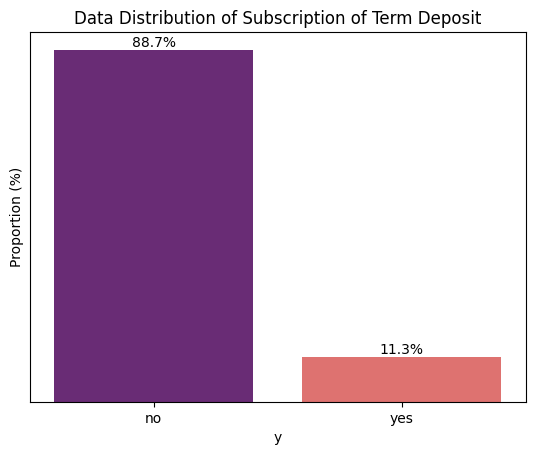

In [14]:
def plot_binary_target_distribution(data, target_column):
    ax = sns.countplot(data=data, x=target_column, palette='magma')
    total = len(data) 

    # Loop through each bar in the countplot
    for p in ax.patches:
        height = p.get_height() 
        percentage = f'{100 * height / total:.1f}%'  
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    # Add x-axis and y-axis titles
    ax.set_xlabel(target_column)
    ax.set_ylabel("Proportion (%)")
    plt.title(f'Data Distribution of Subscription of Term Deposit')
    ax.set_yticks([])  
    plt.show()
    
plot_binary_target_distribution(df, 'y')

<div class="alert alert-block alert-info" style="margin-bottom: 20px; font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The subscription of term deposits exhibits an imbalance.</li>
        <li>The majority of customers (88.7%) did not subscribe to term deposits.</li>
        <li>A relatively smaller proportion (11.3%) of clients opted for term deposits.</li>
        <li>The data shows a clear preference for non-subscription, but it's worth noting that an 11.3% success rate can be considered quite favorable.</li>
        <li>Average success rates when contacting existing customers using an in-house list are 12.95 percent, but 8.21 percent when cold calling potential customers using a third-party prospect. <a href="https://smallbusiness.chron.com/average-success-rate-direct-marketing-73648.html" target="_blank">👉Reference</a></li>
    </ul>
</div>

In [15]:
def create_combined_plot(column):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Subplot 1: Countplot with percentage annotations
    ax1 = sns.countplot(data=df, x=column, ax=axes[0],palette = 'flare')

    total = len(df)

    for p in ax1.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax1.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    ax1.tick_params(axis='x', rotation=90)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count_ (%)')
    ax1.set_yticks([])
    ax1.set_title(f'Distribution of {column}')

    # Subplot 2: Stacked column chart with percentage annotations
    cross_tab = pd.crosstab(df[column], y_num['subscription'], normalize='index').sort_values(by=1, ascending=False)
    ax2 = cross_tab.plot(kind='bar', stacked=True, colormap='Set3', ax=axes[1])

    for p in ax2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax2.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')

    ax2.tick_params(axis='x', rotation=90)
    ax2.set_xlabel(column)
    ax2.set_ylabel('Subscription (%)')
    ax2.set_yticks([])
    ax2.legend(title='Subscription', loc='lower right', labels=['No', 'Yes'])
    ax2.set_title(f'Distribution of {column} by Subscription')
    
    plt.tight_layout()
    plt.show()

<h3 align="left"> <font color='blue'>Job - Type of Job</font></h3>

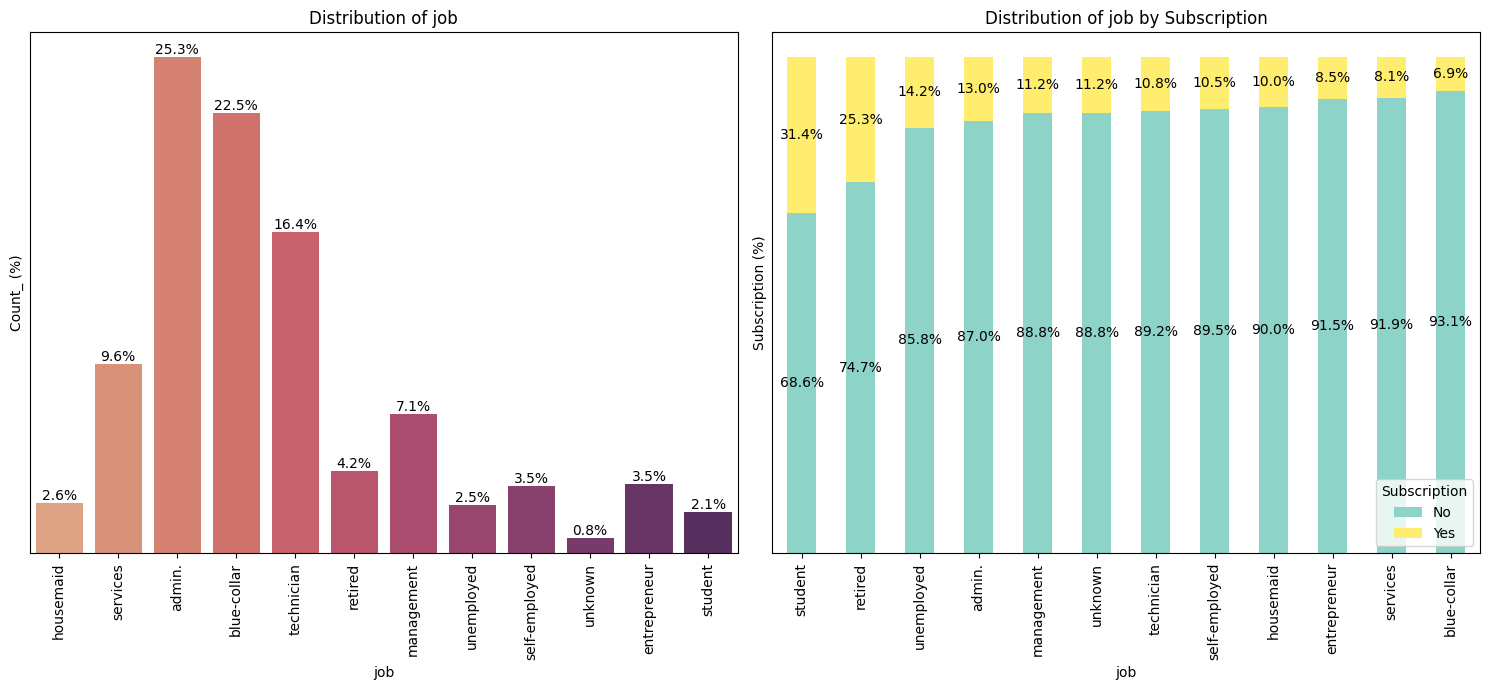

In [16]:
create_combined_plot('job')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The dataset is primarily composed of clients with job categories such as "admin." (25.30%), "blue-collar" (22.47%), and "technician" (16.37%), indicating that these job categories are the most prevalent among the clients.
On the other hand, job categories like "unknown" (0.80%), "student" (2.12%), and "unemployed" (2.46%) are relatively less common in the dataset.</li>
        <li>In the job category breakdown, the top three performing categories in terms of success rates are students, retirees, and the unemployed (31.4%, 25.2%,14.2%) respectively. Conversely, the three categories with the highest failure rates are blue-collar workers, entrepreneurs and services(93.1%, 91.9%, 91.5%)respectively.</li>
        <li>The dataset is skewed towards specific job categories, with administrative, blue-collar, and technician roles being the most frequent. This insight can be valuable for understanding the composition of the client base and tailoring marketing strategies accordingly.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Marital -  marital status</font></h3>

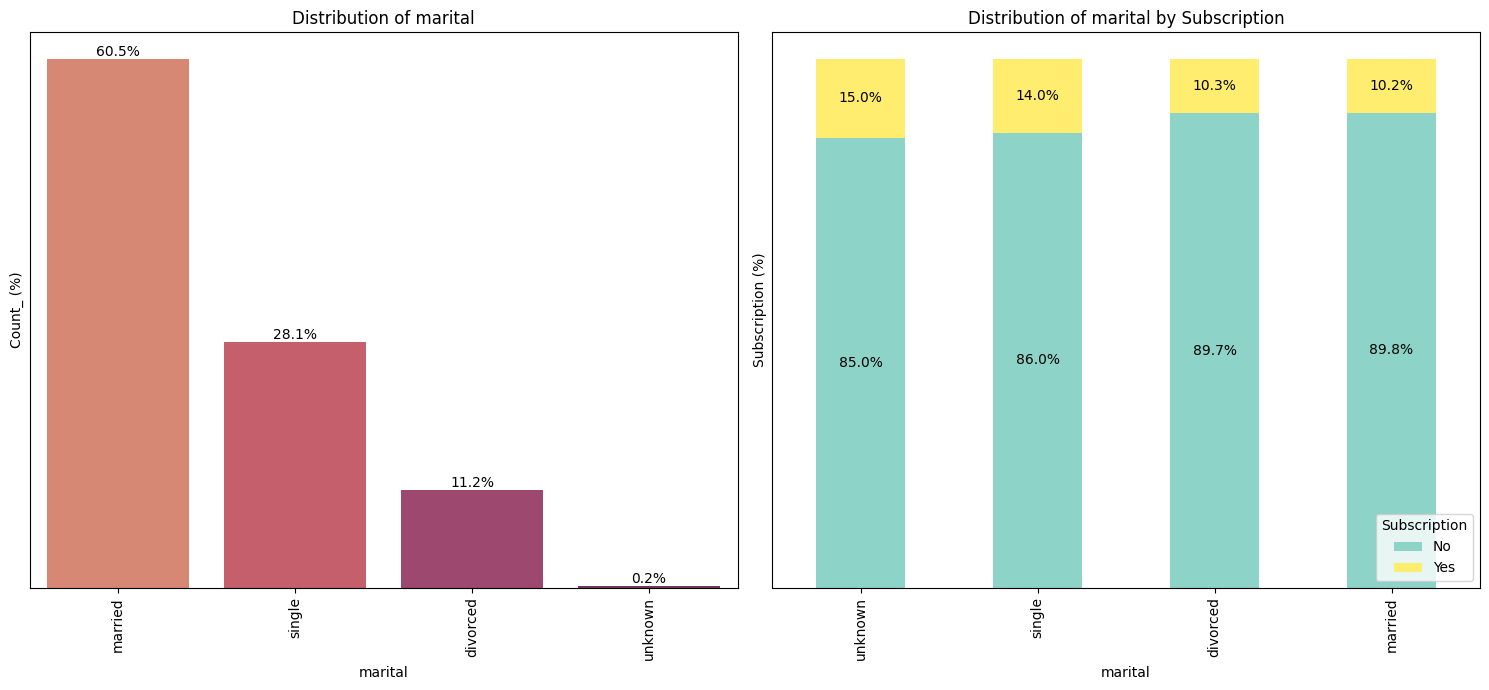

In [17]:
create_combined_plot('marital')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The dataset predominantly consists of married individuals, making up the majority at 60.52%, followed by singles at 28.09%.</li>
        <li>The "unknown" category, with only 0.19%, comprises the smallest portion of the dataset.</li>
        <li>When examining marital status groups, it's evident that the most successful categories are "unknown" and "single," boasting success rates of (15.0% and 14.0%) respectively. On the flip side, the categories "married" and "divorced" exhibit the highest failure rates, standing at (89.8% and 89.6%) respectively.</li>
        <li>The data suggests that a substantial portion of the target audience for marketing campaigns falls under the "married" and "single" categories. These groups should be the primary focus of marketing efforts due to their higher representation.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Education - Type of Education</font></h3>

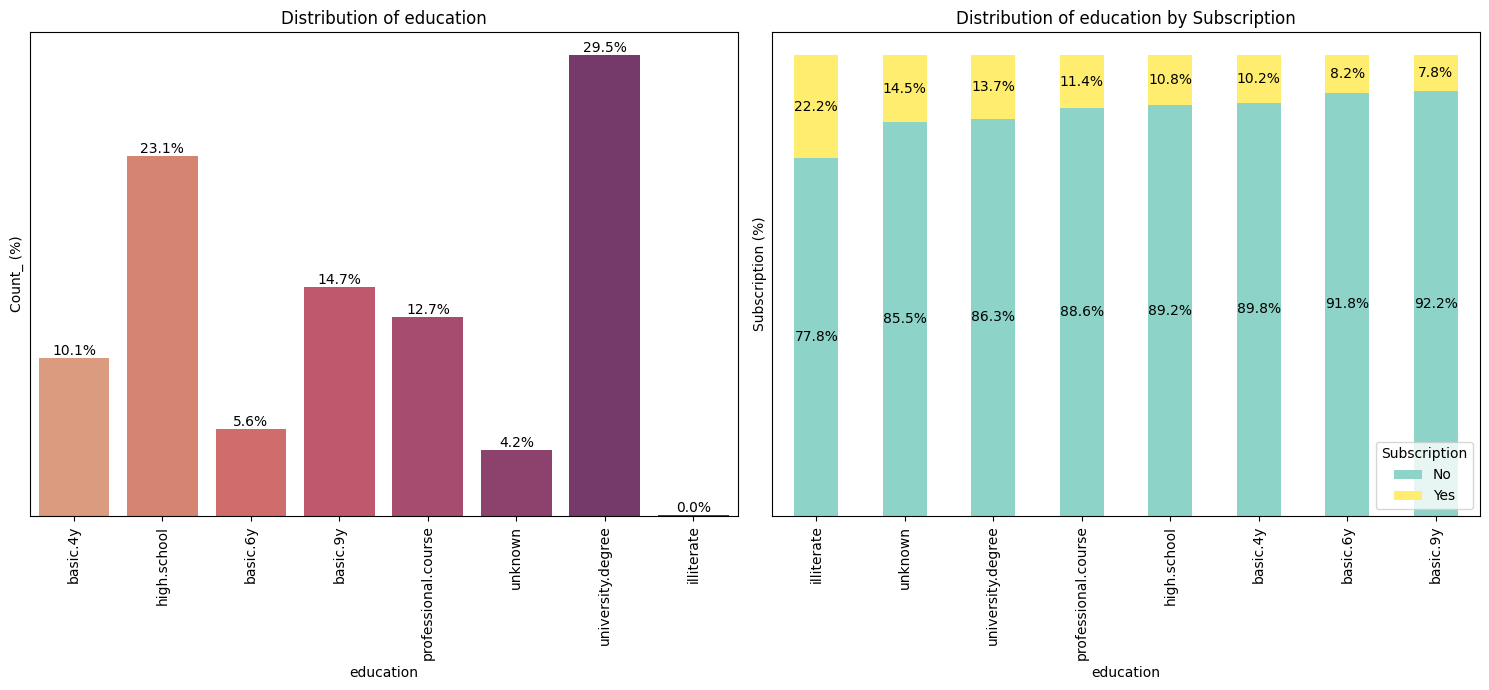

In [18]:
create_combined_plot('education')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number).</li>
        <li>Surprisingly, the Illiterate category has a higher chance(> 20%) of opting for the Term Deposit.</li>
       <li> When examining education levels, Keeping aside Illterate and unknowns the most successful categories are "university.degree" and "professional.course," with success rates of 13.72% and 11.35%, respectively. On the other hand, "basic.9y" and "basic.6y" have the highest failure rates at 92.18% and 91.80%, respectively.</li> 
        <li>The majority of the dataset consists of individuals with at least a high school education, indicating a relatively educated population.This information can be valuable for targeting specific educational segments in marketing or outreach campaigns.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Default - has credit in default?</font></h3>

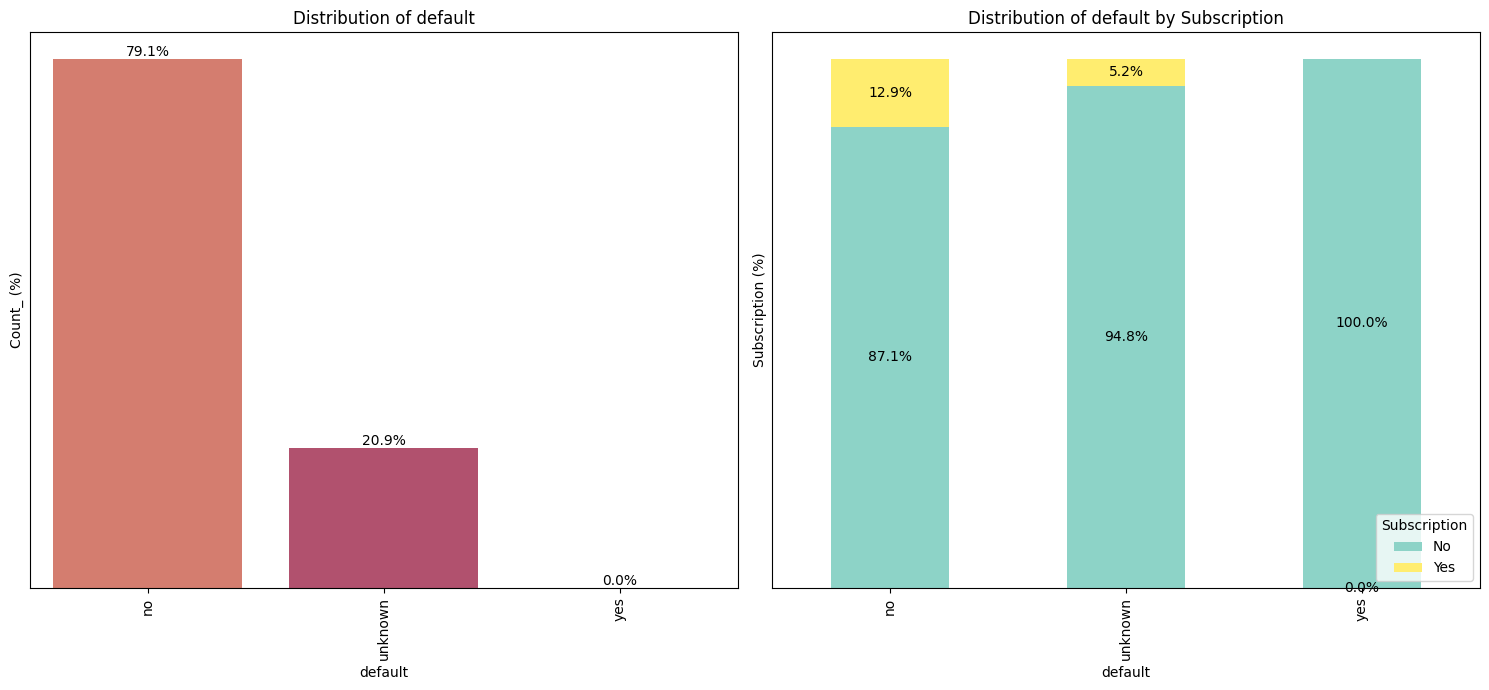

In [19]:
create_combined_plot('default')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>A significant proportion of clients have a default status of "no" (79.12%), indicating a low default rate among the dataset.</li>
        <li>"unknown" category represents a substantial portion (20.87%), suggesting a lack of information or clarity regarding the default status for many clients.Only a very small fraction of clients (0.01%) have a default status of "yes," indicating a rare occurrence of defaults in the dataset.</li>
<li>When examining default status, it's evident that the most successful categories are "no" and "unknown," boasting success rates of 12.88% and 5.15%, respectively. Conversely, the "yes" category exhibits a 0% success rate.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Housing - Housing Loan</font></h3>

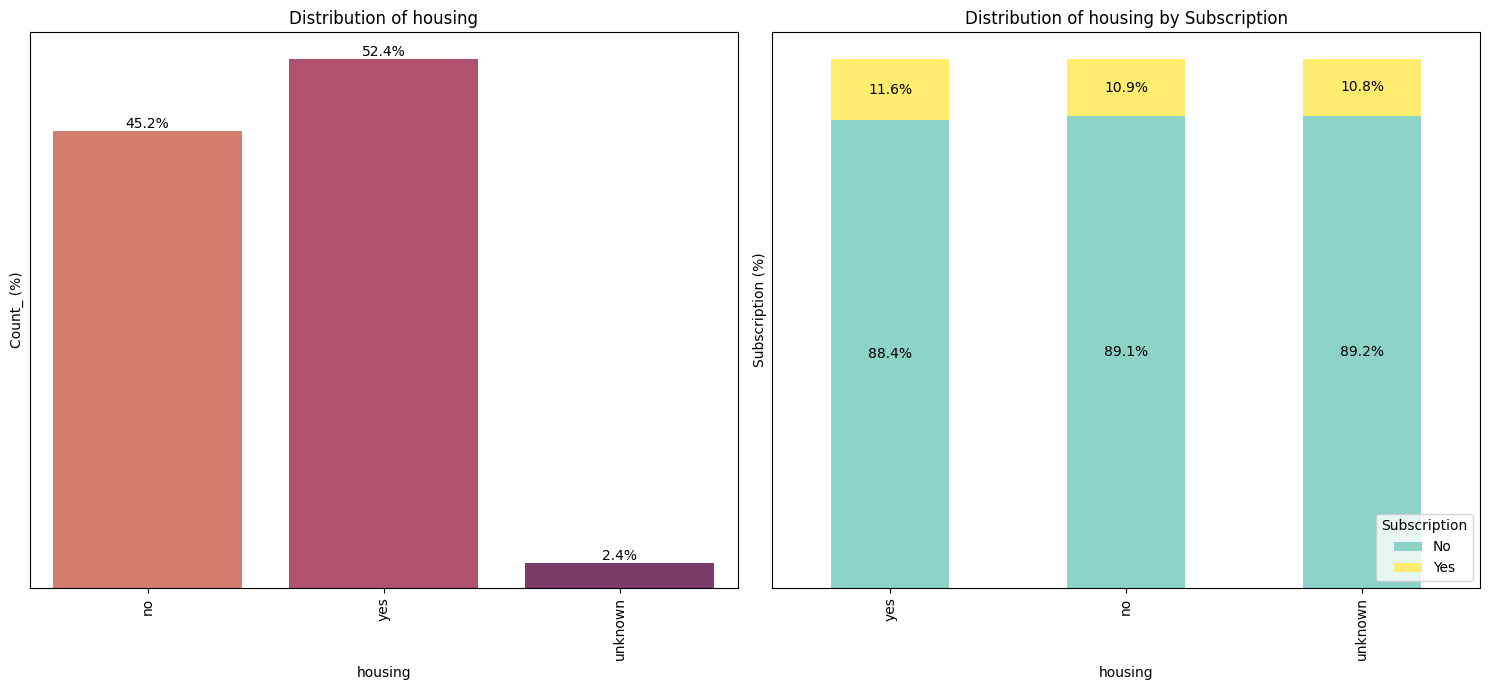

In [20]:
create_combined_plot('housing')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>When analyzing housing status, it's evident that the majority of clients fall into two categories: "no" (45.21%) and "yes" (52.38%), indicating a significant distribution. The "unknown" category constitutes a smaller portion at 2.40%.
In the housing status breakdown, the success rates across different categories are fairly consistent, indicating that housing status has little influence on success rates.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Loan - Personal Loan</font></h3>

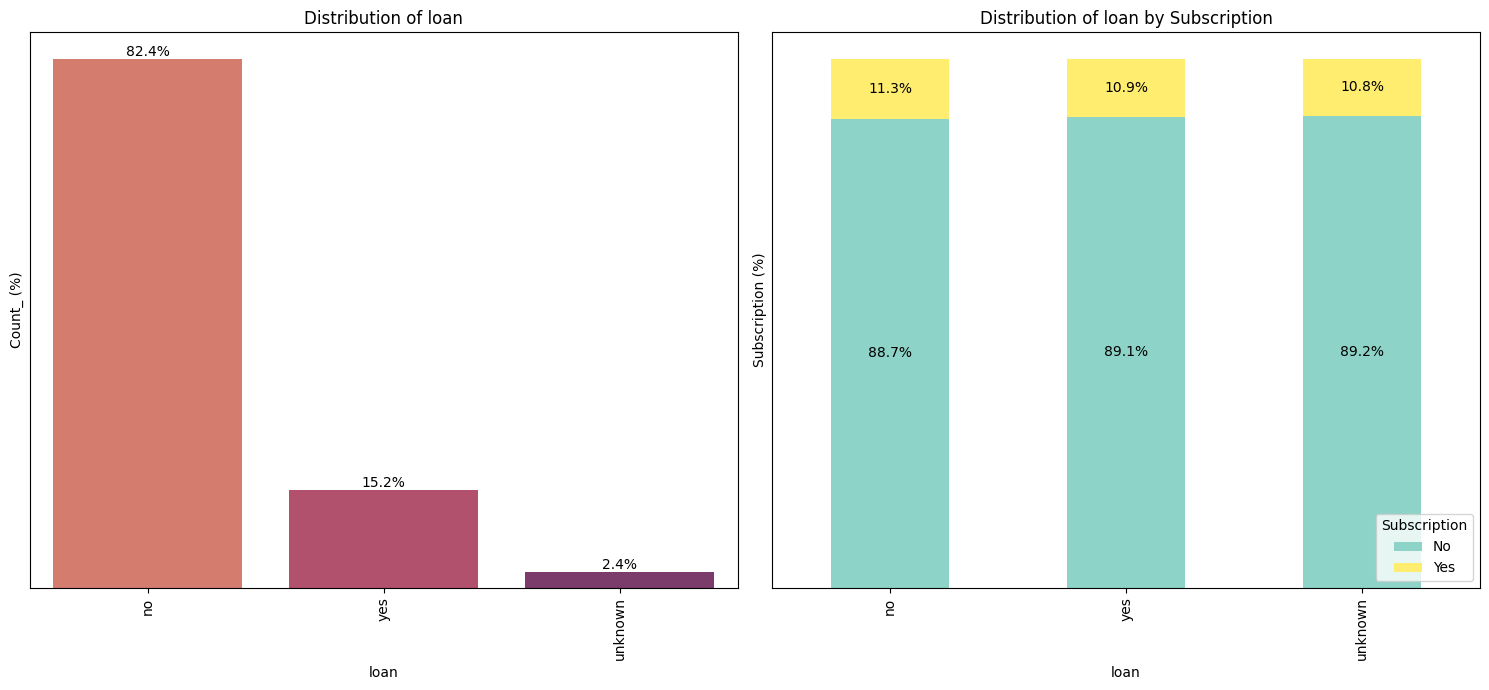

In [21]:
create_combined_plot('loan')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>Among the clients, the vast majority (82.43%) do not have a personal loan, with a small percentage (2.40%) having an unknown loan status. Only a relatively small proportion (15.17%) of clients have a loan.</li>
    <li>In the loan status breakdown, the success rates across different categories are fairly consistent, indicating that loan status has little influence on success rates.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Contact - contact communication type </font></h3>

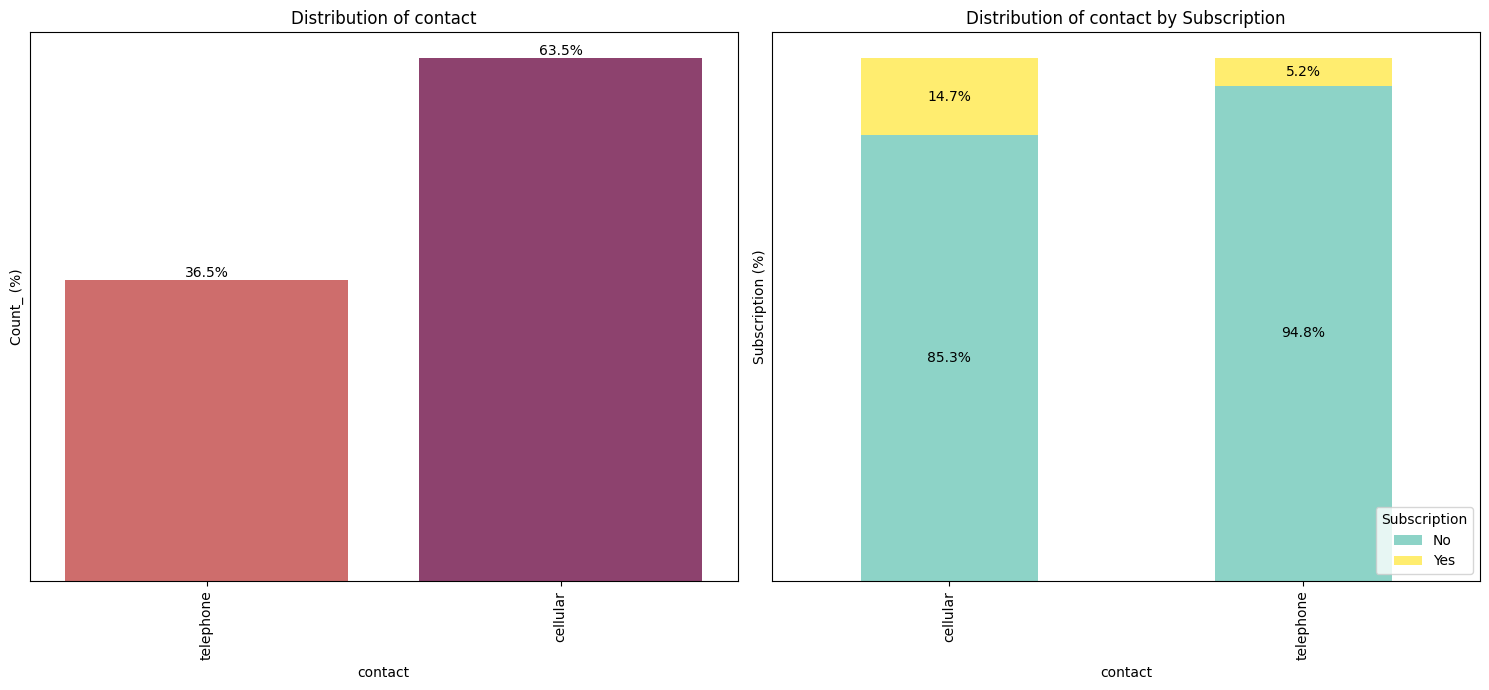

In [22]:
create_combined_plot('contact')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>In terms of communication preferences, cellular communication is significantly more popular, comprising nearly two-thirds of the client base(63.47%), while telephone usage is less common, making up around one-third(36.52%).</li>
        <li>The success rate for clients contacted via cellular communication stands at 85.26%, significantly outperforming the success rate for telephone communication, which is at 47.69%.</li>
<li>The data suggests that utilizing cellular communication as the primary means of contact may lead to higher campaign success rates, as it exhibits a substantially lower failure rate compared to telephone communication.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Month - Last contact month of year</font></h3>

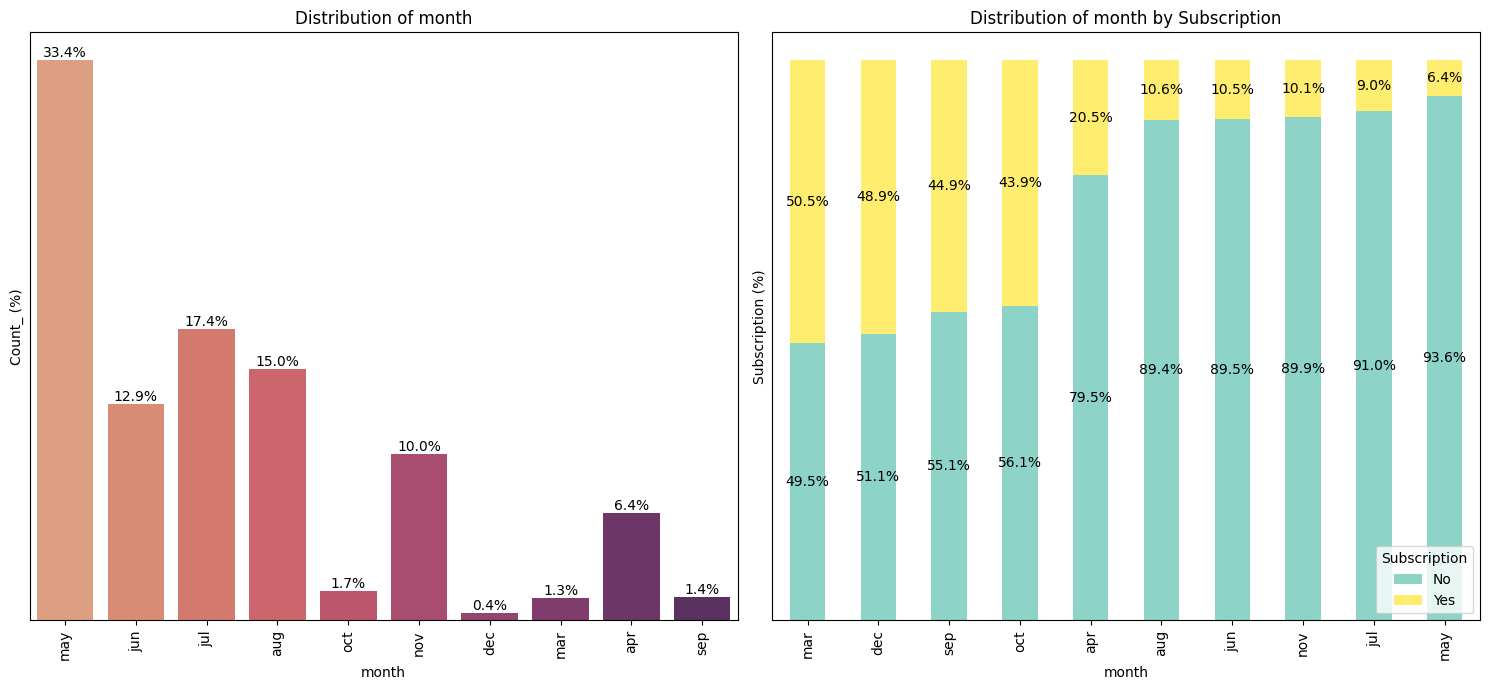

In [23]:
create_combined_plot('month')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
       <li> May, July and August consistently have the highest client presence in the dataset, suggesting that these months are pivotal for client interactions.</li>
        
<li>Months like December, October, and September have significantly lower client percentages, indicating potential seasonality effects or lower marketing activity during these periods.</li>
<li>June, and November also have notable client percentages, but they are not as dominant as May and July.
<li>When analyzing the success and failure rates across different months, it's evident that March and December have relatively balanced success and failure rates, with a slight inclination towards success rate (50.55% and 48.90%respectively). In contrast, May exhibits a notable skew towards failure (6.4%), while July leans slightly more towards success (9.0%).</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Day_of_Week - Last contact day of the month </font></h3>

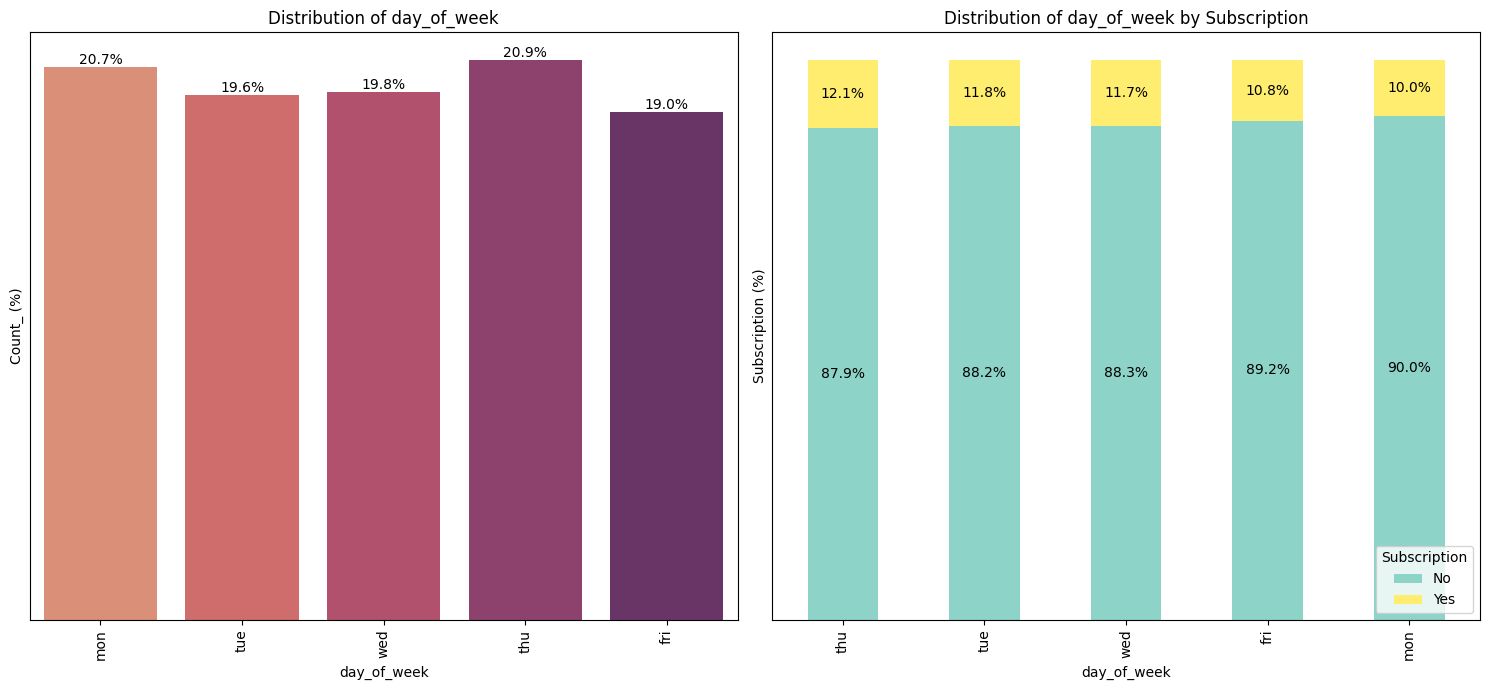

In [24]:
create_combined_plot('day_of_week')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
    <li>Contact distribution by days of the week shows relatively consistent patterns, with Thursday and Monday receiving the most attention. Tuesday and Wednesday are marginally less active, while Friday falls in between these categories.
The absence of data for Saturday and Sunday suggests that there are no marketing campaign contacts made on these weekend days.</li>     
<li>The distribution of marketing campaign contacts among different days of the week appears to be relatively uniform, with no significant deviations. This suggests that the marketing efforts are evenly spread throughout the week, and there are no extreme variations in contact strategies for different weekdays.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Previous Outcome (poutcome) -  Outcome of the previous marketing campaign</font></h3>

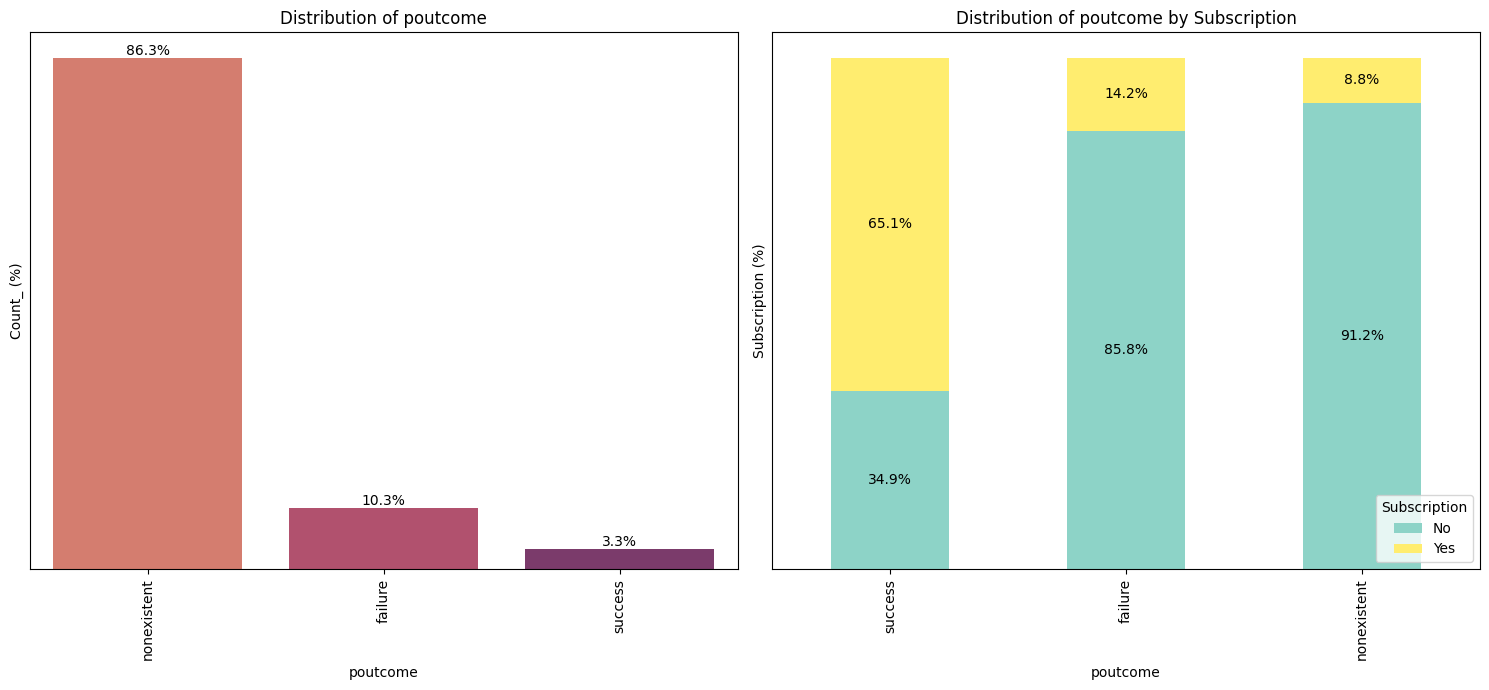

In [25]:
create_combined_plot('poutcome')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
    <li>The distribution of outcomes from the previous marketing campaign (Poutcome) shows that the majority of clients, approximately 86.34%, had no previous marketing campaign contact ("Nonexistent"). This suggests that a significant portion of the dataset comprises individuals who were not targeted in prior campaigns.</li>
    <li>About 10.32% of clients experienced a "Failure" in the previous campaign, indicating that a portion of the audience was not responsive to previous marketing efforts.</li>
    <li>A smaller percentage, around 3.33%, achieved "Success" in previous campaigns, suggesting that a minority of clients responded positively to past marketing initiatives.</li>
    <li>The "Success" category represents a smaller but valuable group of clients who have previously engaged positively with marketing campaigns and should be considered for continued engagement strategies.</li>
    </ul>
</div>


<h2 align="left"><font color='DarkCyan'><u>Numeric Features</u></font></h2>

<h3 align="left"> <font color='blue'>Age</font></h3>

In [26]:
# Define bin edges and labels
bin_edges = [0, 20, 30, 40, 50, 60, 80,  100] 
bin_labels = ['0-20', '21-30', '31-40', '41-50', '51-60','61-80', '81-100'] 

# Create a New DataFrame bin_df and Name the column 'age_bin' with the age bins
bin_df = pd.DataFrame()
bin_df['age_bin'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, right=False)

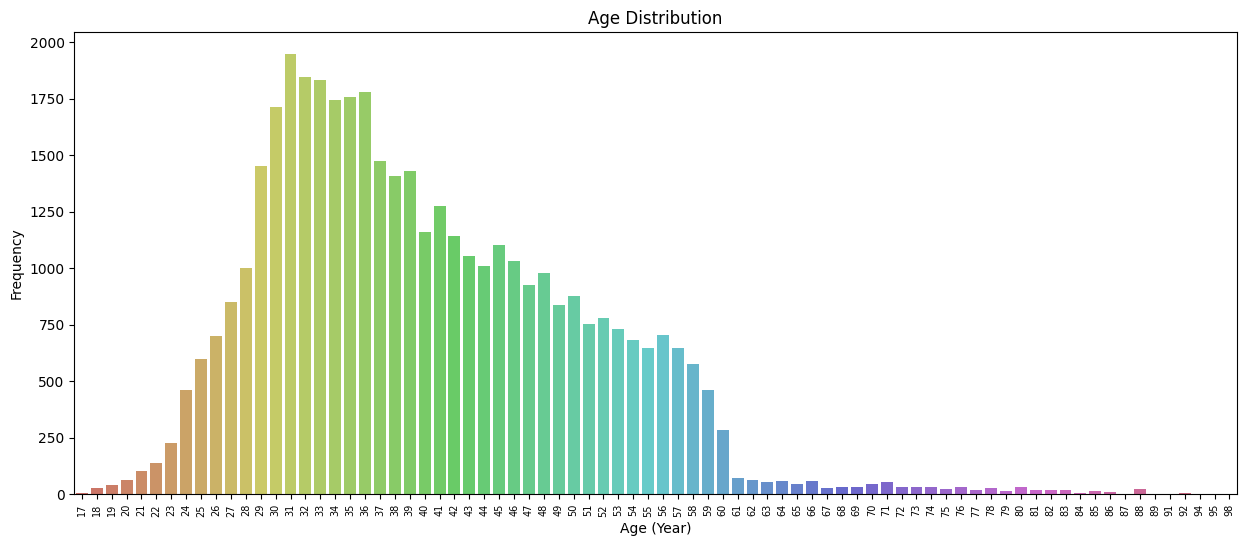

In [27]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))

# Original 'age' distribution (wider)
sns.countplot(data=df, x='age', palette = 'hls')
plt.tick_params(axis='x', rotation=90, labelsize=7)
plt.title('Age Distribution')
plt.xlabel('Age (Year)')
plt.ylabel('Frequency')
plt.show()

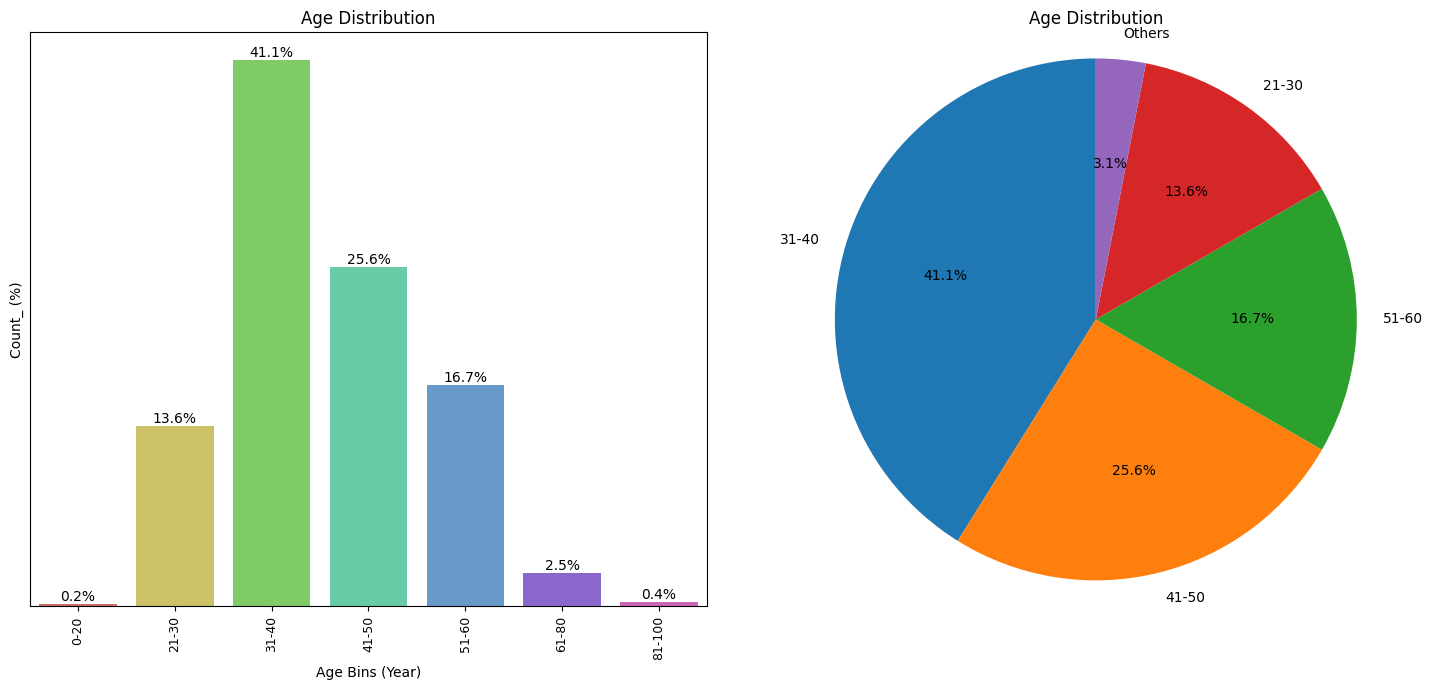

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Calculate the value counts and percentages for 'age_bin'
age_bin_counts = bin_df['age_bin'].value_counts()
age_bin_percentages = age_bin_counts / len(bin_df) * 100

# Apply the threshold (5%) to group values into "Others"
threshold = 5
age_bin_filtered = age_bin_percentages[age_bin_percentages >= threshold]
age_bin_filtered['Others'] = age_bin_percentages[age_bin_percentages < threshold].sum()

# Subplot 1: 'age_bin' distribution (narrower) with percentage labels
ax2 = axes[0]
sns.countplot(data=bin_df, x='age_bin', ax=ax2, palette='hls')
ax2.set_title('Age Distribution')
ax2.set_xlabel('Age Bins (Year)')
ax2.set_ylabel('Count_ (%)')
ax2.tick_params(axis='x', rotation=90, labelsize=9)
ax2.set_yticks([])

# Calculate and display percentage labels for Subplot 1
total = len(bin_df)
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 2: Pie chart of 'age_bin' with "Others" category
ax1 = axes[1]
ax1.set_title('Age Distribution')
ax1.pie(age_bin_filtered, labels=age_bin_filtered.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The data illustrates a clear concentration of individuals in the 31-50 age range, suggesting that this demographic is prominent within the dataset. The age group 31-40 is the most prevalent, comprising approximately 41.12% of the data.</li>
        <li>As age increases, there is a noticeable decline in representation, with the 0-20 and 81-100 age groups having the lowest percentages at 0.18% and 0.36%, respectively.</li>
        <li>The Age distribution underscores the importance of tailoring marketing strategies to effectively engage the middle-aged population making them prime target for term deposit subscription campaigns, while recognizing the difficulties in reaching both the youngest and oldest segments of the demographic spectrum.</li>
<li>Younger Individuals - This might be attributed to varying factors such as limited financial capacity, lower investment awareness in younger individuals.</li>
<li>Older Age - They might be more conservative financial options due to retirement and fixed incomes leading to reduced interest or accessibility in the elderly population or older individuals may have already made financial decisions.</li>
<li>Marketing strategies might not effectively reach or resonate with these extreme age groups, requiring tailored approaches.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Duration - last contact duration, in seconds</font></h3>

In [29]:
# Define bin edges and labels
bin_edges = [0, 100, 200, 300, 400, 500, 600,  700, 800,900,1000,1250,1500,2000,3000,4000,5000] 
bin_labels = ['0-100', '101-200', '201-300', '301-400', '401-500','501-600', '601-700', '701-800', '801-900','901-1000', '1001-1250','1251-1500','1501-2000','2001-3000','3001-4000','4001-5000'] 

# Create a New DataFrame bin_df2 and Name the column 'duration_bin' with the duration bins
bin_df2 = pd.DataFrame()
bin_df2['duration_bin'] = pd.cut(df['duration'], bins=bin_edges, labels=bin_labels, right=False)

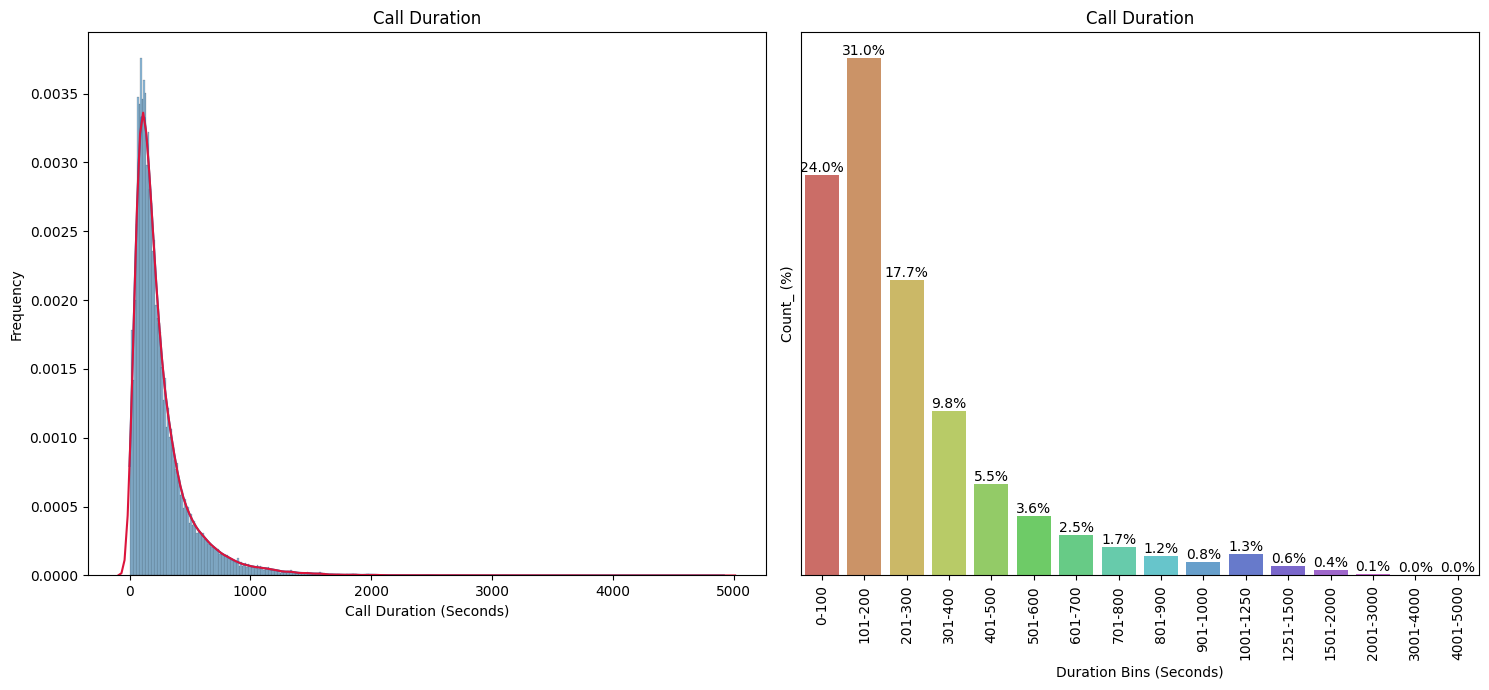

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1: Histogram of 'duration'
axes[0].set_title('Call Duration')
axes[0].set_xlabel('Call Duration (Seconds)')
axes[0].set_ylabel('Frequency')
sns.histplot(data=df, x='duration', ax=axes[0], kde=True, stat='density')
sns.kdeplot(data=df, x='duration', color='crimson', ax=axes[0])

# Subplot 2: Countplot of 'duration_bin' with percentage labels
sns.countplot(data=bin_df2, x='duration_bin', ax=axes[1], palette = 'hls')
axes[1].set_title('Call Duration')
axes[1].set_xlabel('Duration Bins (Seconds)')
axes[1].set_ylabel('Count_ (%)')
axes[1].set_yticks([])

# Calculate and display percentage labels for Subplot 2
total = len(df)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom')

axes[1].tick_params(axis='x', rotation=90)

# Show the combined plot
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The most common call duration falls within the range of 101-200 seconds, accounting for approximately 31.0% of the dataset.</li>
        <li>As call durations increase beyond 200 seconds, their occurrence progressively declines.</li>
        <li>Calls with very long durations, such as those in the 2001-3000, 3001-4000, and 4001-5000 ranges, are extremely rare, together comprising only a small fraction of the dataset.</li>
        <li>This distribution suggests that a substantial portion of calls are moderately long, possibly indicating comprehensive customer interactions. Longer calls are less frequent but can be indicative of more complex inquiries.
Understanding these patterns can assist in optimizing customer service strategies and resource allocation.</li>  
    </ul>
</div>


<h3 align="left"> <font color='blue'>Campaign - Number of contacts performed during this campaign and for this client (numeric, includes last contact)</font></h3>

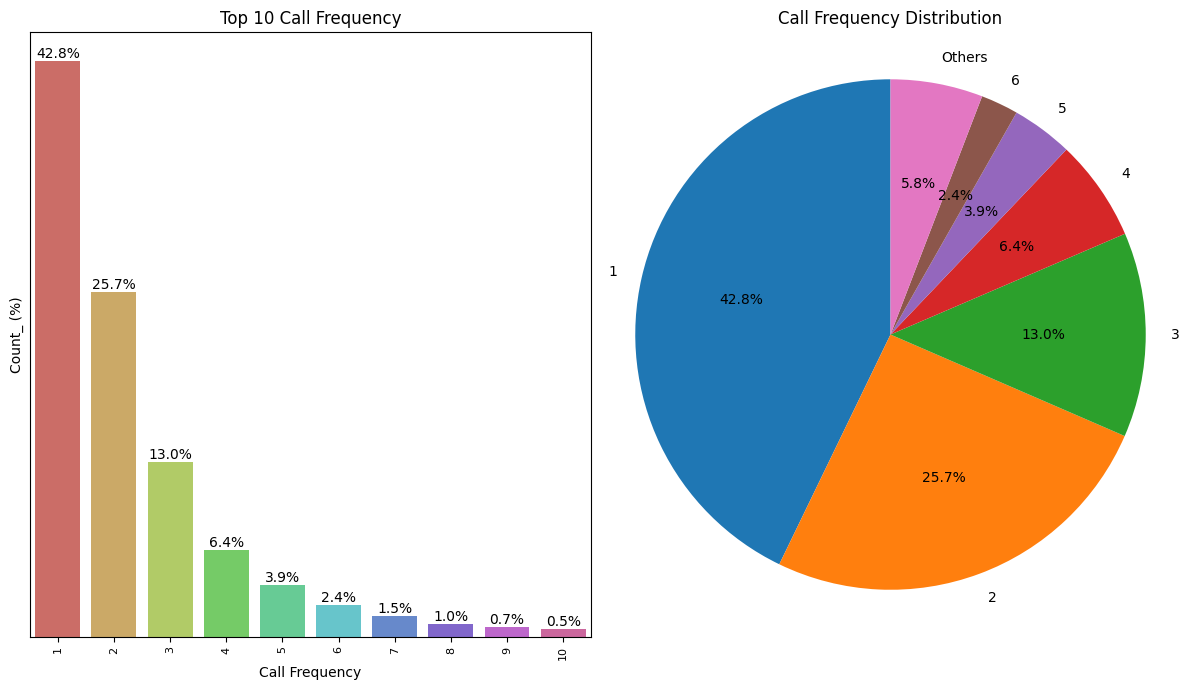

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# Subplot 1: Barplot (Top 10 Call Frequency)
campaign_counts = df['campaign'].value_counts()
campaign_percentages = campaign_counts / len(df) * 100

sns.barplot(x=campaign_counts.index[:10], y=campaign_counts.head(10), palette='hls', ax=axes[0])
axes[0].set_xlabel('Call Frequency')
axes[0].set_ylabel('Count_ (%)')
axes[0].set_title('Top 10 Call Frequency')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)
axes[0].set_yticks([])

# Calculate and display percentage labels for Subplot 1
total = len(df)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom')

# Subplot 2: Pie Chart (Campaign Distribution)

# Assuming df['campaign'] contains your data
threshold = 2  # Threshold percentage

# Identify values below the threshold and group them into 'Others'
below_threshold = campaign_percentages[campaign_percentages < threshold]
campaign_percentages['Others'] = below_threshold.sum()
campaign_percentages = campaign_percentages[campaign_percentages >= threshold]

axes[1].pie(campaign_percentages, labels=campaign_percentages.index, autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axes[1].set_title('Call Frequency Distribution')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>Increasing the number of calls to a customer only reduces the chances of him accepting the product.</li>
        <li>The data shows a clear pattern of diminishing frequency as the number of calls increases. Most clients were contacted only once (approximately 42.83%).</li>
        <li>Single-contact clients dominate the dataset, indicating that the majority of clients are reached with just one call.
A distinct category labeled "Others" with approximately 5.84% is included. This category likely encompasses clients who received (5 to 56 calls), but it's grouped for simplicity in the chart.</li>
        <li>The data suggests that the campaign strategy involved targeted follow-up calls for a smaller proportion of clients, as evidenced by the decreasing percentages for higher call numbers.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Pdays -  Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)</font></h3>

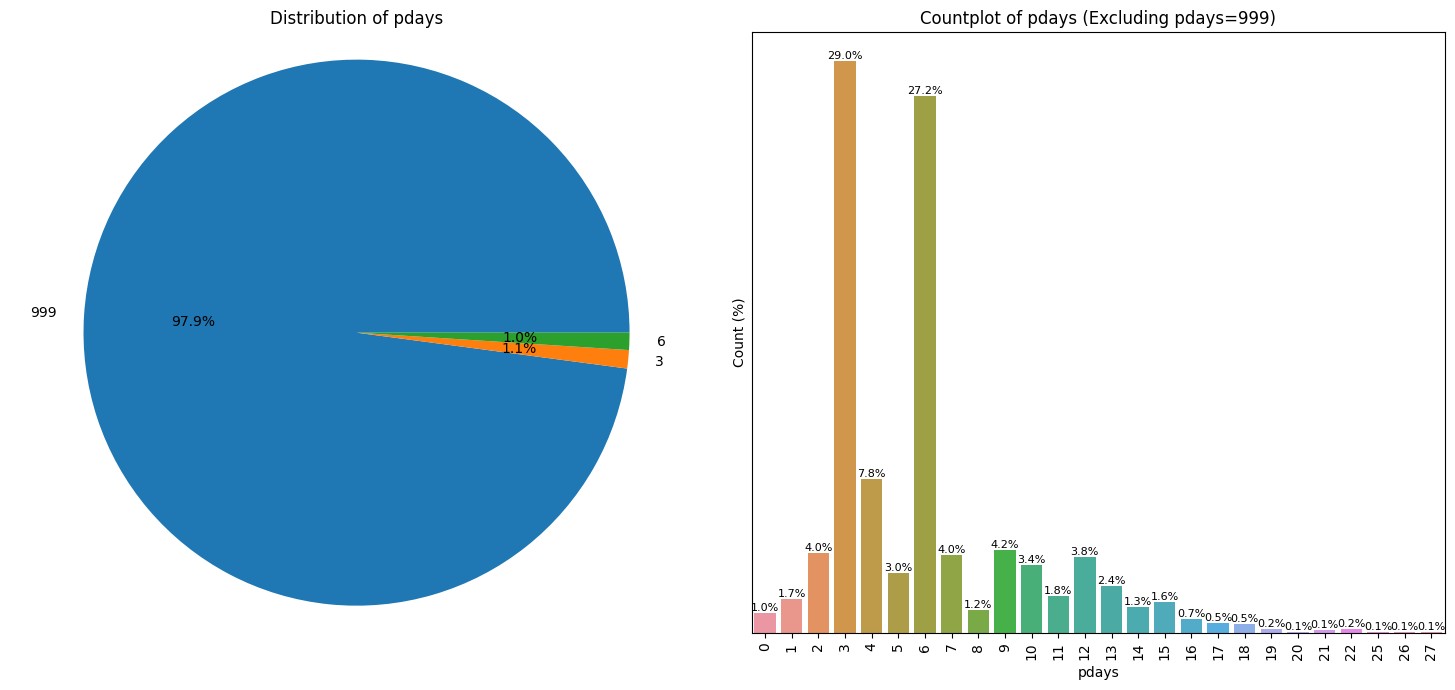

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))

# Subplot 2: Pie chart of 'pdays' distribution with a threshold
column_counts = df['pdays'].value_counts()
threshold = 0.01
filtered_counts = column_counts[column_counts / column_counts.sum() >= threshold]
labels = filtered_counts.index

axes[0].pie(filtered_counts, labels=labels, autopct='%1.1f%%')
axes[0].set_title('Distribution of pdays')
axes[0].axis('equal')

# Subplot 3: Countplot of 'pdays' (Excluding pdays=999)

# Filter the DataFrame to exclude rows where 'pdays' is 999
filtered_df = df[df['pdays'] != 999]

# Calculate the percentages
total = len(filtered_df)
percentages = (filtered_df['pdays'].value_counts() / total) * 100
sns.countplot(data=filtered_df, x='pdays', ax=axes[1])

# Add percentage labels on top of each bar
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8)

axes[1].set_xlabel('pdays')
axes[1].set_ylabel('Count (%)')
axes[1].set_title('Countplot of pdays (Excluding pdays=999)')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_yticks([])
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The prevailing scenario is that clients had no prior contact, indicated by the value 999, which constitutes the majority of clients in the dataset, accounting for a substantial 97.9% of them.</li>
        <li>Atleast a single contact improves the changes of the campaign drastically. Look for Pdays=999 ( which means customer was not contacted before) After excluding 999 (indicating no previous contact), the most common scenario for days since the last contact is 3 days, with a percentage of approximately 28.98%, 6 days (27.19%). Days beyond this range have progressively lower percentages, indicating less frequent occurrences.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Previous - Number of contacts performed before this campaign and for this client</font></h3>

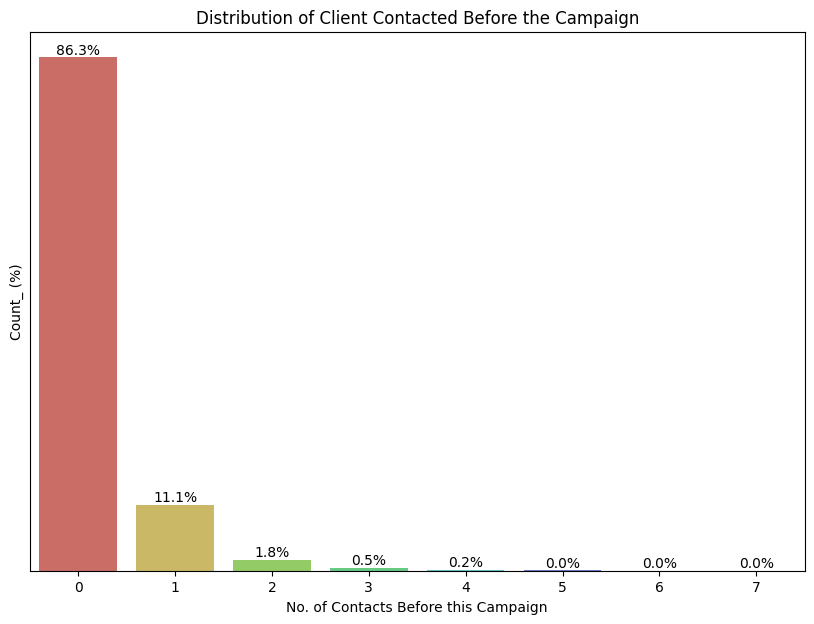

In [33]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, x='previous',palette = 'hls')

# Calculate total count
total = len(df)

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

ax.set_title('Distribution of Client Contacted Before the Campaign')
ax.set_xlabel('No. of Contacts Before this Campaign')
ax.set_ylabel('Count_ (%)')
ax.set_yticks([])
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
         <li>The majority of clients (86.34%) had zero previous contacts before this campaign. Around (11.07%) of clients had one previous contact.</li>
 <li>The percentages progressively decrease as the number of previous contacts increases, indicating less frequent occurrences.
There is a clear pattern of diminishing contact frequency as the number of previous contacts increases beyond one.</li>
         <li>The Data suggests that a considerable portion of clients had no prior contact,indicating a significant pool of potential clients for initial outreach and emphasizing the importance of effective first-time engagement strategies.
Understanding the diminishing contact frequency as the number of previous contacts increases can guide efforts to optimize outreach for clients with varying levels of prior interaction.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Employee Variation Rate (emp.var.rate) - Quarterly Indicator</font></h3>

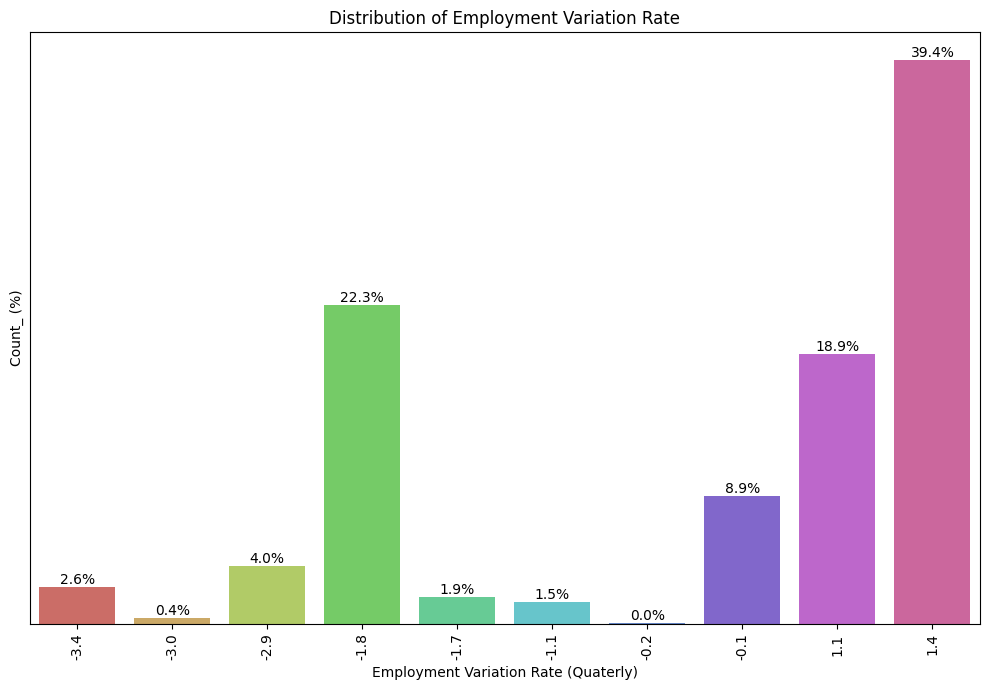

In [34]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, x='emp.var.rate',palette = 'hls')

# Calculate total count
total = len(df)

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Employment Variation Rate (Quaterly)')
ax.set_ylabel('Count_ (%)')
ax.set_yticks([])
ax.set_title('Distribution of Employment Variation Rate')

# Show the plot
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The dataset exhibits a diverse range of employment variation rates, including both positive and negative values.
A significant negative variation rate of (-1.8) stands out, indicating a substantial decrease in employment levels during the observed period.</li>
        <li>Positive variation rates of (1.1 and 1.4) are prominent, suggesting periods of employment growth and economic expansion.
The presence of uncommon extreme values like (-3.4 and -3.0) highlights periods of significant employment decline.</li>   
    </ul>
</div>


<h3 align="left"> <font color='blue'>Consumer Price Index (cons.price.idx) - Monthly Indicator</font></h3>

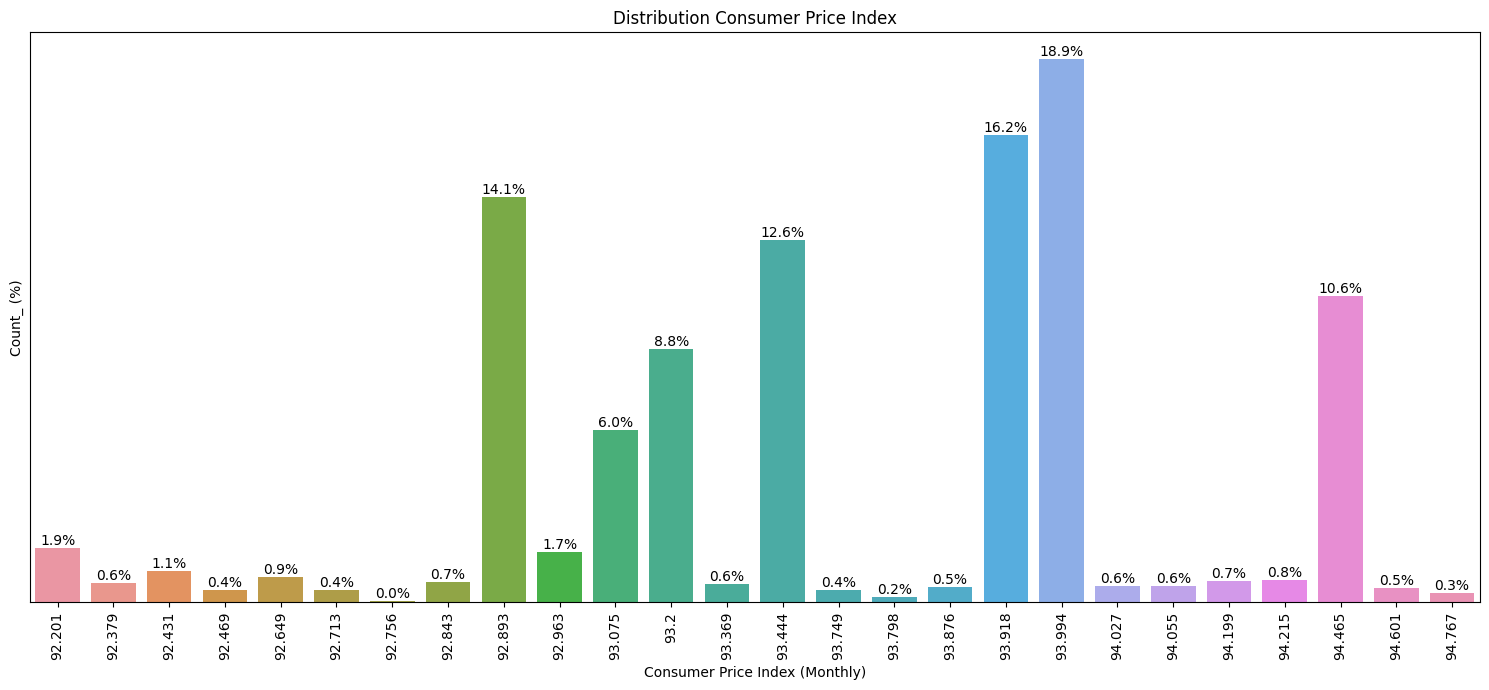

In [35]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, x='cons.price.idx')

# Calculate total count
total = len(df)

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Consumer Price Index (Monthly)')
ax.set_ylabel('Count_ (%)')
ax.set_yticks([])
ax.set_title('Distribution Consumer Price Index')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The Consumer Price Index (CPI) values illustrate fluctuations in price levels, with notable peaks in specific index values.
Significantly varying price levels are observed at CPI values like 93.994 (18.85%) and 93.918 (16.2%).
Less dramatic price changes are reflected in CPI values like 92.756 (0.1%) and 93.798 (0.2%)..</li>
        <li>The data appears to be clustered around specific CPI values, with varying percentages associated with each cluster. This suggests that certain price levels are more common during particular time periods.</li>
        <li> The data exhibits a range of CPI values with varying percentages. This suggests that consumer prices have experienced fluctuations over time, with some periods showing more significant changes than others.</li>
        <li>Peaks at CPI values like 93.994 (18.85%) and 93.444 (12.56%) represent instances of significant price shifts. These extreme fluctuations may have been influenced by economic factors or external events.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Consumer Confidene Index (Cons.conf.idx) - Monthly Indicator</font></h3>

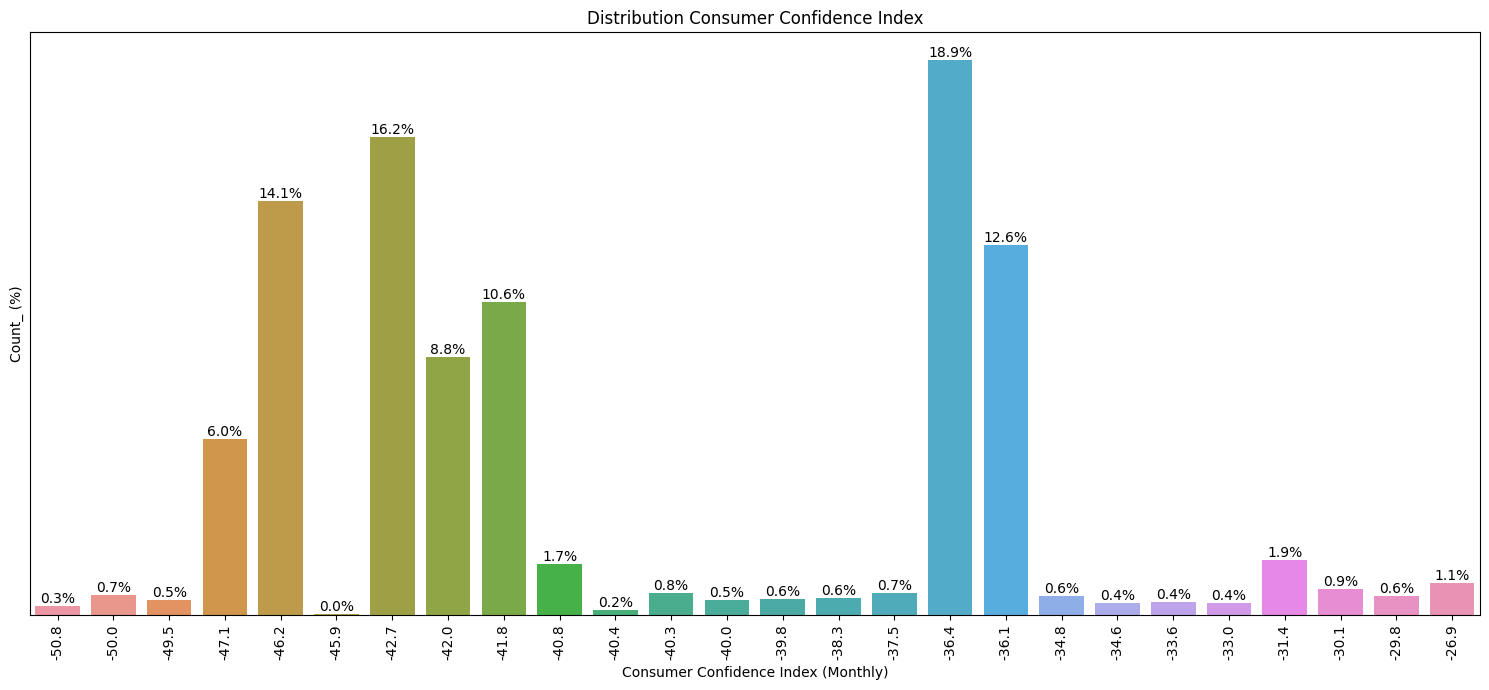

In [36]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, x='cons.conf.idx')

# Calculate total count
total = len(df)

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Consumer Confidence Index (Monthly)')
ax.set_ylabel('Count_ (%)')
ax.set_yticks([])
ax.set_title('Distribution Consumer Confidence Index')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>Most prominently, the dataset includes values around (-36.4 and -42.7) representing significant consumer pessimism at 18.85% and 16.23%, respectively.</li>
<li>Several index values, such as (-45.9, -40.4, and -50.8) have lower percentages, signifying their relatively lower frequency in the dataset.</li>
<li>Most Consumer Confidence Index values in the dataset cluster around (1%), indicating their relatively lower occurrence, with other index values having higher frequencies.</li>
        <li>Consumer confidence levels exhibit a cyclical pattern, with alternating periods of high and low confidence. This suggests that consumer sentiment is influenced by various economic factors and can change over time.</li>
<li>There are extreme values in the dataset, particularly at (-36.4 and -42.7) where consumer confidence is notably high, and at (-45.9 and -40.4) where confidence is considerably lower. These extreme values may correspond to exceptional economic conditions or events.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Euribor 3 Month Interest Rate (euribor3m) - Daily Indicator</font></h3>

In [37]:
# Define bin edges and labels
bin_edges = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]  # Define the bin edges (adjust as needed)
bin_labels = ['0.5-1.0', '1.1-1.5', '1.6-2.0', '2.1-2.5', '2.6-3.0', '3.1-3.5', '3.6-4.0', '4.1-4.5', '4.6-5.0']

# Create a new column 'euribor3m_bin' with the age bins
bin_df3 = pd.DataFrame()
bin_df3['euribor3m_bin'] = pd.cut(df['euribor3m'], bins=bin_edges, labels=bin_labels, right=False)

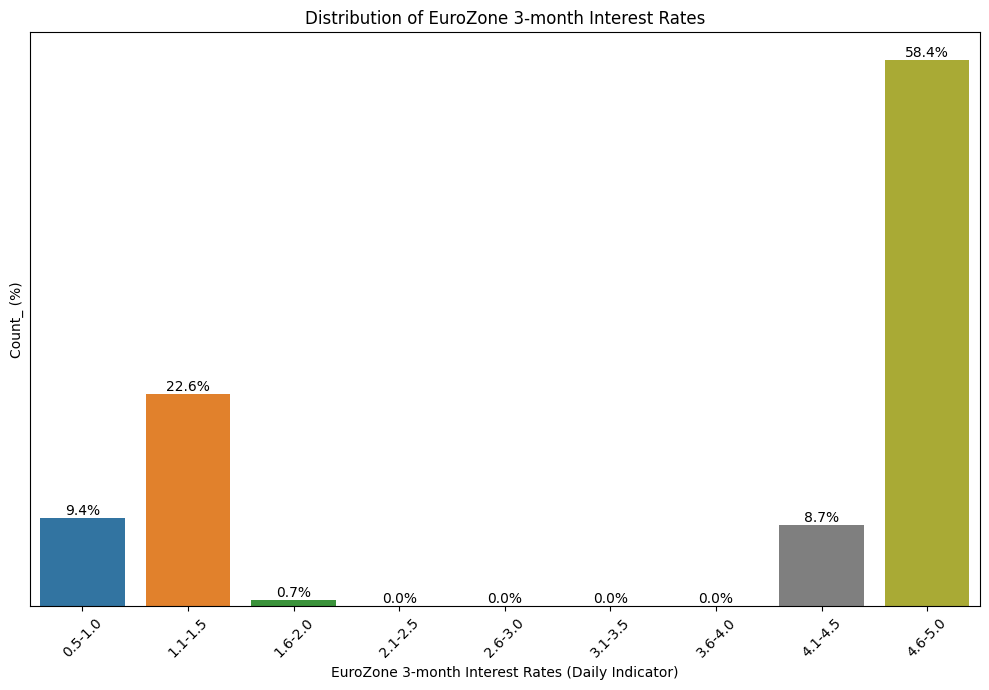

In [38]:
# Calculate the percentage of each category
percentage_data = bin_df3['euribor3m_bin'].value_counts(normalize=True) * 100

# Create a countplot
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=bin_df3, x='euribor3m_bin')

# Annotate each bar with the percentage directly
total_count = len(bin_df3)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Add labels and a title
plt.xlabel('EuroZone 3-month Interest Rates (Daily Indicator)')
plt.ylabel('Count_ (%)')
plt.title('Distribution of EuroZone 3-month Interest Rates')
plt.yticks([])
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li> The Euribor 3-month rate distribution reveals that the majority of data points fall into the "4.6-5.0" bin, representing a substantial percentage of 58.44% and "1.1-1.5" bin is noteworthy, accounting for 22.64% of the dataset, indicating a moderate range of Euribor rates.</li>
        <li>There are bins like "2.1-4.0" with very low record of occurrences. This lack of data suggests that the Euribor 3-month rate rarely ventures into these extreme ranges during the observed period.</li>
       <li> It's important to assess the data's quality, as extreme values with zero occurrences could be indicative of missing or incomplete data for certain periods.</li>
    </ul>
</div>


<h3 align="left"> <font color='blue'>Number of Employees (Nr.Emplyed) - Number of employees - Quarterly Indicator</font></h3>

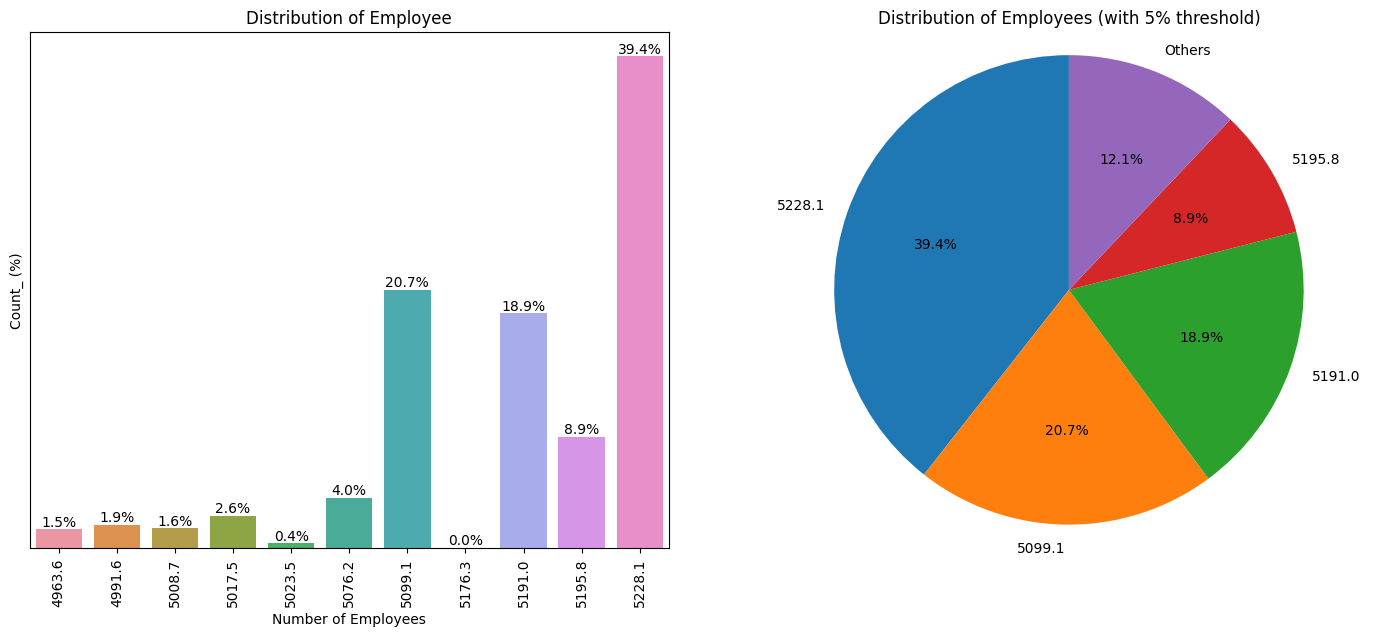

In [39]:
# Create a figure with a 1x2 grid layout
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1: Countplot of 'nr.employed'
ax1 = axes[0]
sns.countplot(data=df, x='nr.employed', ax=ax1)

# Calculate total count
total = len(df)

# Annotate each bar with percentage
for p in ax1.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax1.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Number of Employees')
ax1.set_ylabel('Count_ (%)')
ax1.set_title('Distribution of Employee')
ax1.set_yticks([])

# Subplot 2: Pie chart of 'nr.employed' with a 5% threshold
ax2 = axes[1]

# Calculate the value counts and percentages for 'nr.employed'
nr_employed_counts = df['nr.employed'].value_counts()
total = len(df)
percentages = (nr_employed_counts / total) * 100

# Apply the threshold (5%) to group values into "Others"
threshold = 5
filtered_counts = nr_employed_counts[percentages >= threshold]
filtered_counts['Others'] = nr_employed_counts[percentages < threshold].sum()

# Create a pie chart
ax2.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')  
ax2.set_title('Distribution of Employees (with 5% threshold)')
plt.tight_layout(pad=3)
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The dataset prominently features "5099.1" (20.72%) and "5228.1" (39.41%) as the most common employment levels.</li>
        <li>It also exhibits variability with a range of employment values, suggesting diverse labor market scenarios..</li>
        <li>Higher the Employees Level it is Better, Top 3 Employee Level accounts for 67.1 % of dataset.</li>
        <li>The presence of certain values at higher percentages may indicate clustering or common employment practices in specific sectors or industries.</li>
        <li>Identifying prevalent employment levels assists in understanding the workforce composition within the dataset.</li>
        <li>Understanding the distribution of employment levels is essential for assessing economic conditions, labor market dynamics, and their potential effects on business operations and investment decisions.</li>
    </ul>
</div>


<h2 align="left"><font color='DarkCyan'><u>Histogram of Numerical Variables</u></font></h2>

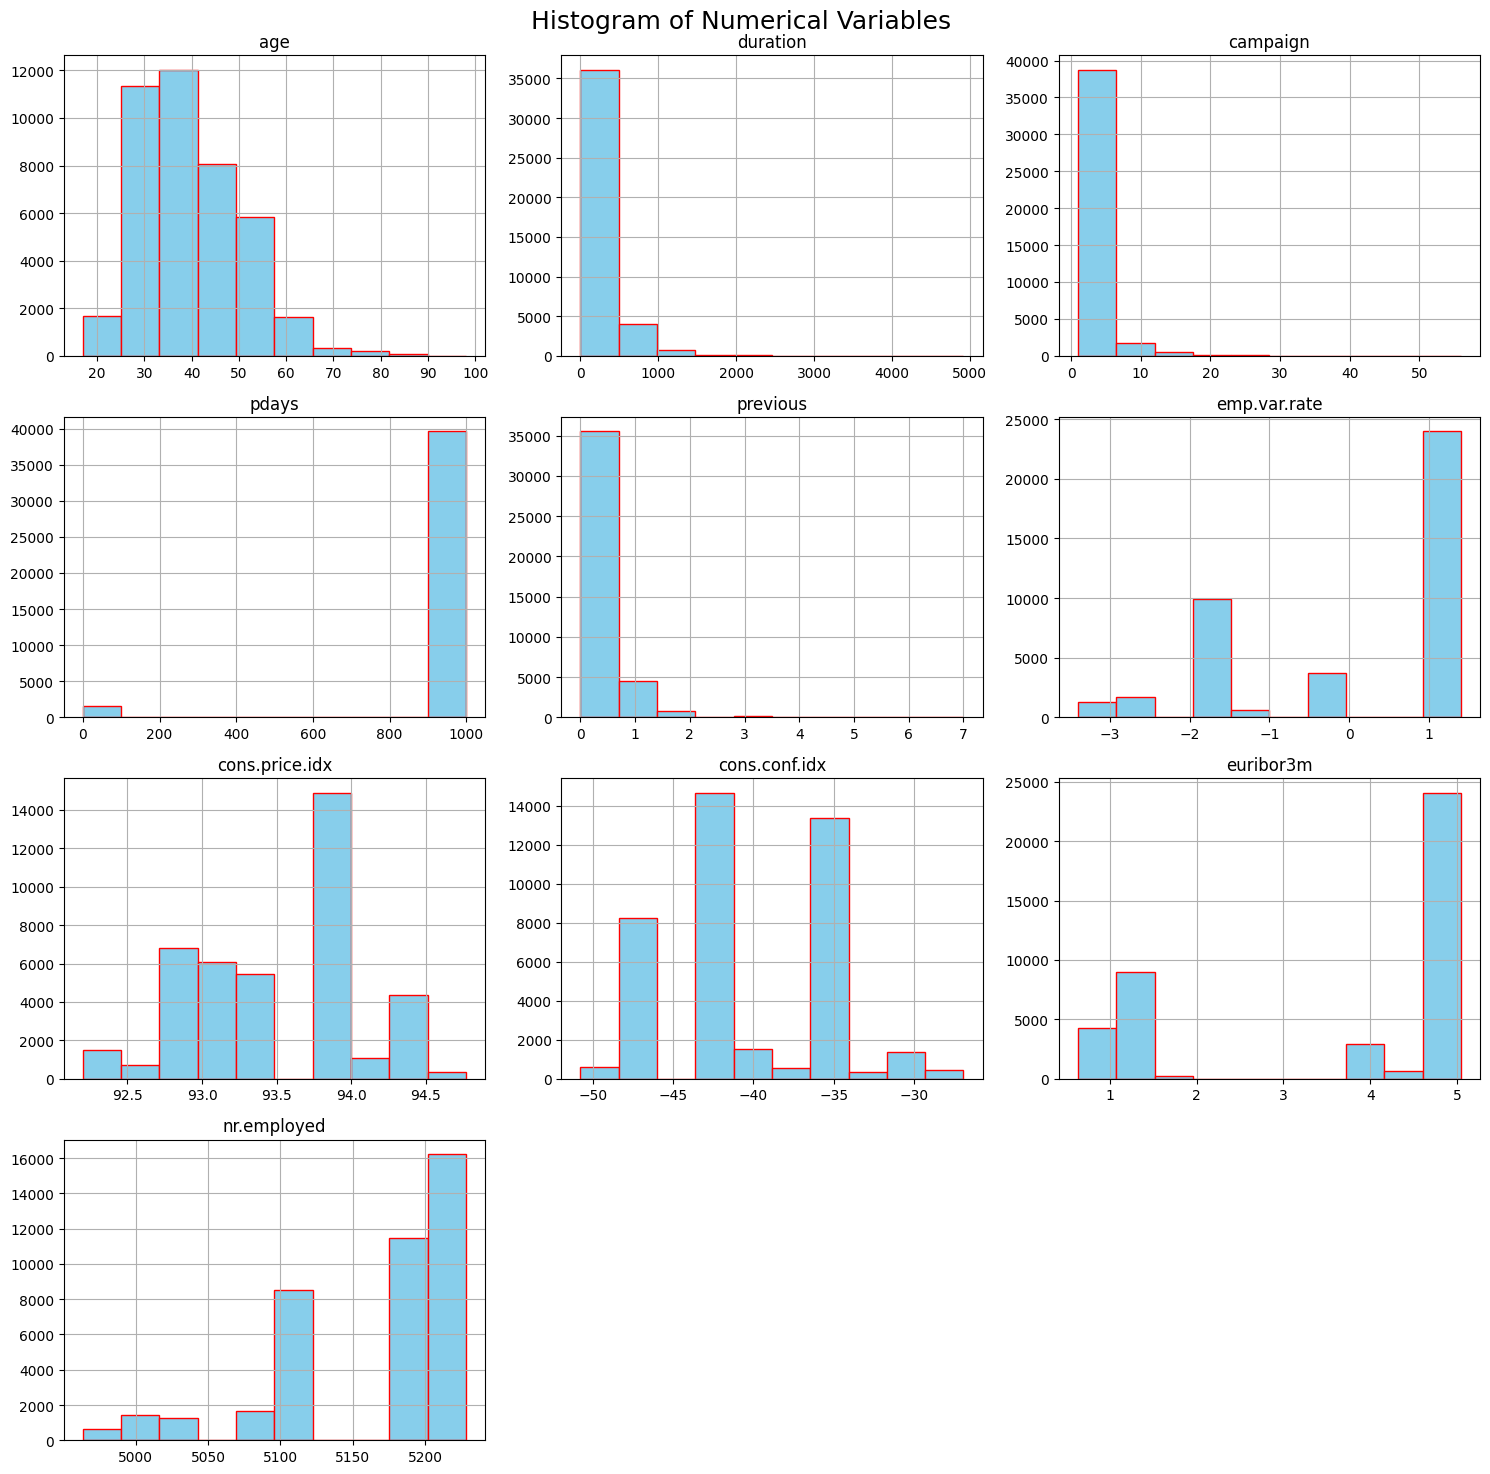

In [40]:
df.hist(figsize=(15, 15), edgecolor='r', color='skyblue')
plt.suptitle('Histogram of Numerical Variables ', fontsize=18)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>None of the features exhibhit gaussian distribution.</li>
        <li>Continuous Numeric Variables - age,duration, euribor3m</li>
                <li>Age, Duration and Campaign tend to have skewness and should be inspected if transformation improves the distribution.</li>
        <li>Discrete Numeric Variables - campaign, pdays,previous, emp.var.rate, cons.price.idx, cons.conf.idx, nr.employed</li>
    </ul>
</div>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#0093F9;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-4"></a> 
<p style="padding: 10px;
              color:white;">
              4. Featue Engineering 🛠️
</p>
</div>

In [21]:
from sklearn.model_selection import train_test_split

# Train-Test Split Executing Initially To Prevent Data Leakage
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:20],df.iloc[:,-1],test_size=0.3, random_state=35)

# Converting y_train, y_test back to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((28823, 20), (28823, 1), (12353, 20), (12353, 1))

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 16px;">
    <b>⚙️ Modeling Insights:  </b>
    <ul>
        <li>By splitting the data first, to ensure that feature engineering is based solely on the training data, to avoid data leakage and making the model evaluation more reliable and realistic.</li>
    </ul>
</div>

<h2 align="left"><font color='DarkCyan'><u>1. Handling Unknown Data (Missing) </u></font></h2>

In [42]:
# Poutcome 
Poutcome = round(len(df[df['poutcome'] == 'nonexistent']) / len(df) * 100)
print(f"Percentage of NonExistent Data: {Poutcome}%")

Percentage of NonExistent Data: 86%


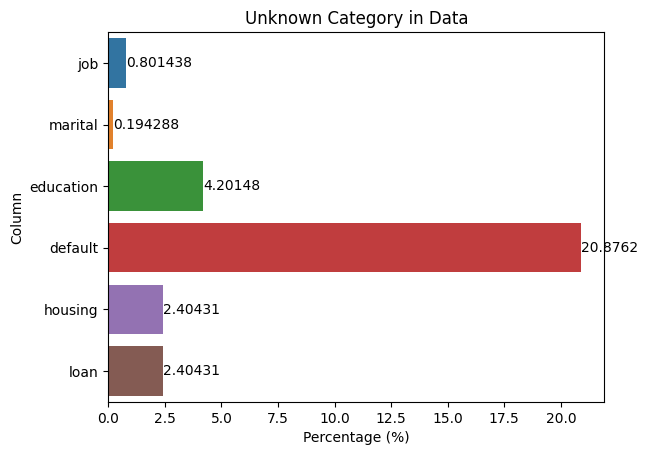

In [43]:
# Unknown Values
df_unknown = pd.DataFrame(columns=['Column Name', 'Unknown Count'])

for column in df[categorical_columns]:
    unknown_count = len(df[df[column] == 'unknown'])/len(df)*100
    if unknown_count > 0:
        df_unknown = pd.concat([df_unknown, pd.DataFrame({'Column': [column], 'Unknown': [unknown_count]})], ignore_index=True)

ax = sns.barplot(data=df_unknown,y='Column',x='Unknown')
ax.set_title("Unknown Category in Data")
ax.set_xlabel("Percentage (%)")
for i in ax.containers:
    ax.bar_label(i,)

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 14px;">
    <b>⚙️ Modeling Insights: </b>
    <ul>
        <li>Since the "Poutcome" feature contains 86% non-existent data, it is unlikely to provide valuable information when training a model. Therefore, it is advisable to remove or drop the "Poutcome" feature from the dataset.</li>
        <li>Options for addressing unknown data include imputation, dropping, or treating the unknown data as a distinct category, such as using "XYZ" for the "Job" feature. Considering the likelihood of future data containing unknown categories, this approach accommodates that possibility.</li>
    </ul>
</div>

In [22]:
# Dropping Poutcome 
X_train.drop(['poutcome'],axis=1,inplace=True)
X_test.drop(['poutcome'],axis=1,inplace=True)

<h2 align="left"><font color='DarkCyan'><u>2.Outlier Detection and Treatment </u></font></h2>

<h3 align="left"> <font color='blue'>Box Plot </font></h3>

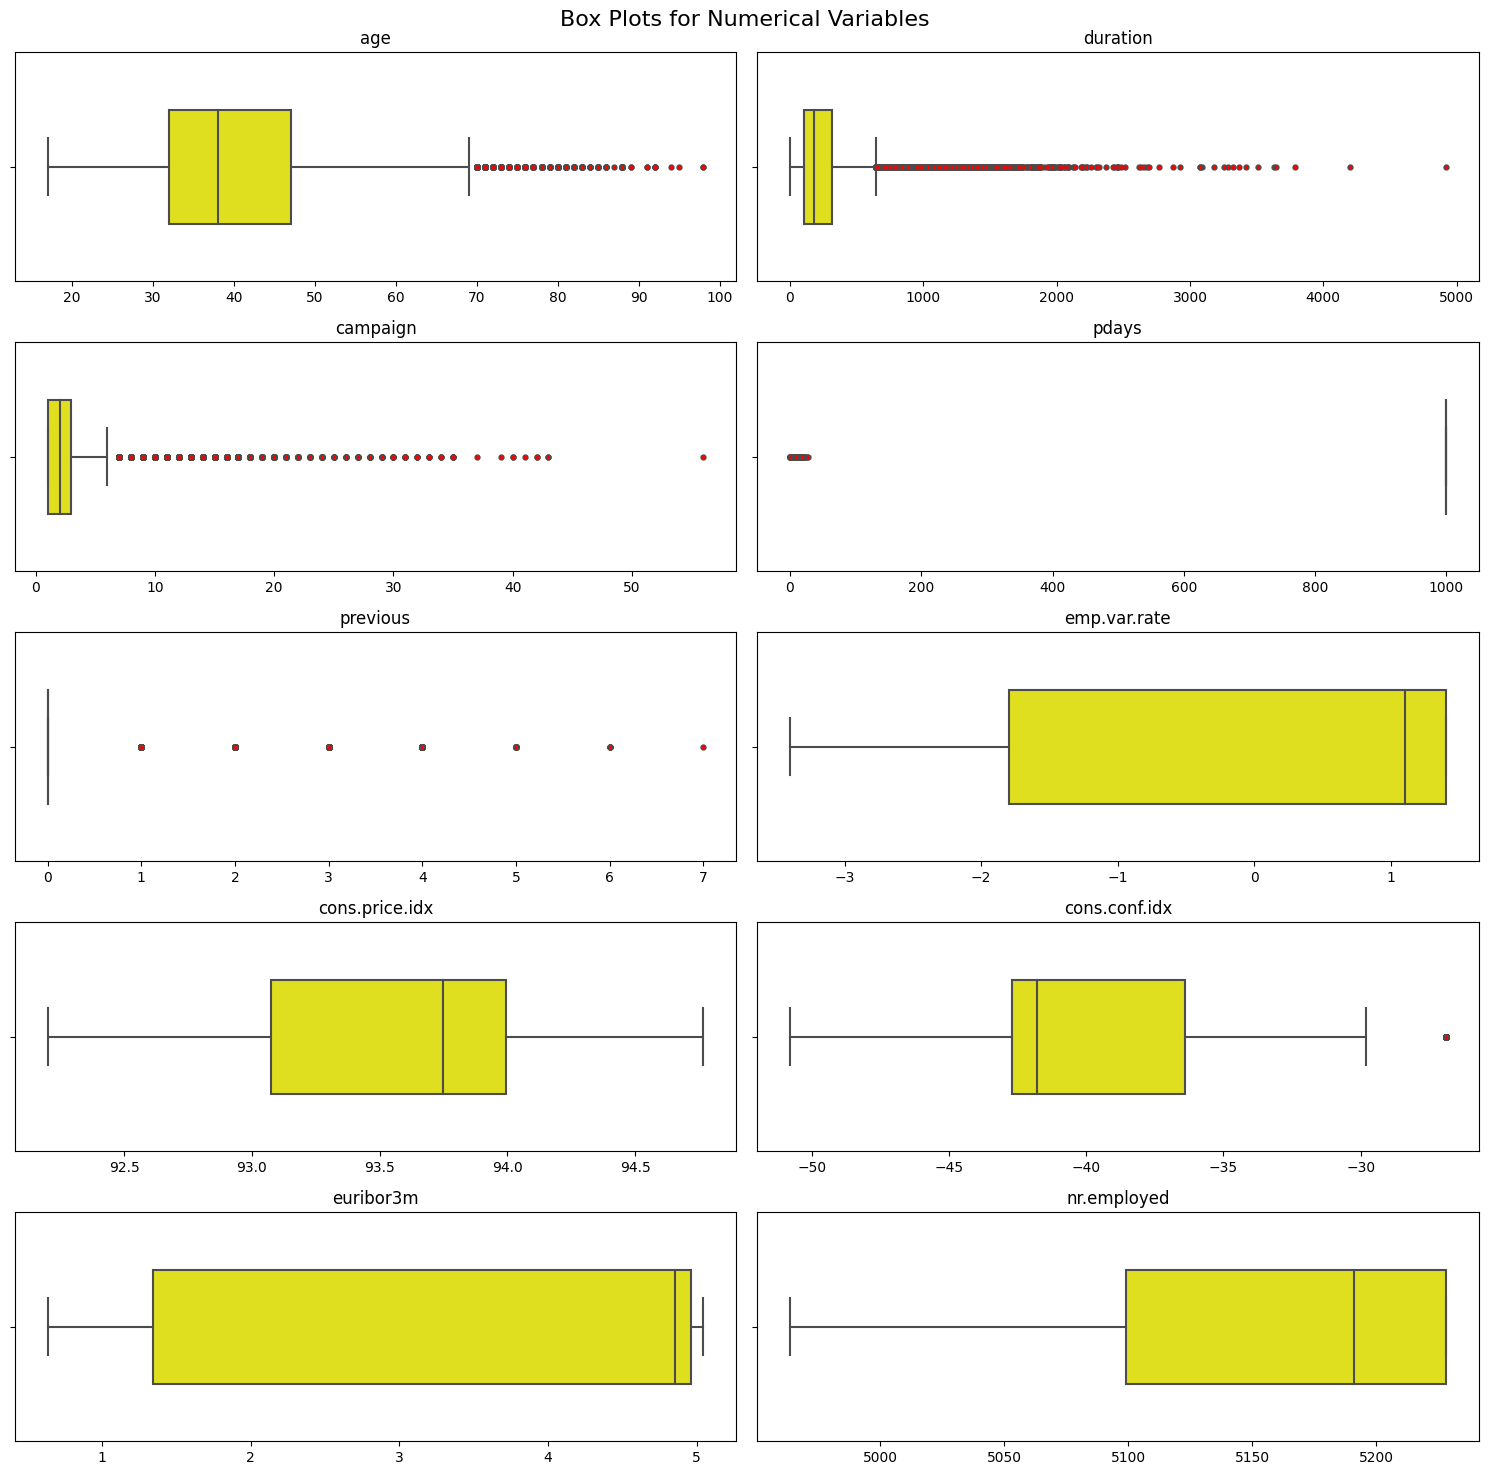

In [45]:
fig,axes = plt.subplots(5,2,figsize=(15,15))

def plot_two(feat,i,j):
    sns.boxplot(x=df[feat],color='yellow', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 3.5}, ax=axes[i,j])
    axes[i, j].set_title(feat)
    axes[i, j].set_xlabel('')

for i,feat in enumerate(numeric_columns):
    j = i%2 #0 or 1
    plot_two(feat,i//2,j)
    warnings.filterwarnings("ignore", category=UserWarning)

fig.suptitle('Box Plots for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>It's important to note that the majority of numeric features are discrete variables, while only a subset of features exhibit outliers that necessitate specific treatment. </li>
        <li>The features with outliers are "Age," "Duration," "Campaign," and "Pdays."</li>
        <li>The majority of outliers are located beyond the third quartile (Q3) of the data distribution, The Consumer Confidence Index contains only one outlier.</li>
       <li> The "Duration" feature exhibits outliers, indicating that a few individuals had extended conversations.</li>
    </ul>
</div>


<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 14px;">
    <b>⚙️ Modeling Insights: </b>
    <ul>
        <li>We can use the percentile method, but to maintain data integrity and prevent distortion, let's opt for data trimming rather than setting specific values.</li>
        <li>
For the "Age," "Duration," "Campaign," and "Pdays" features, we are considering the 99.5th percentile upper values, which involves trimming the top 0.5% of the data.</li>
        <li>After considering the impact on data loss and taking into account domain knowledge, it is most appropriate to employ the percentile method rather than the IQR (Interquartile Range) method.</li>
    </ul>
</div>

<h3 align="left"> <font color='blue'>Percentile Method </font></h3>

In [23]:
# Outlier Removal by Percentile Method

outlier_features_1 = ['age','duration','campaign']

# Define the percentile threshold
percentile_threshold = 99.5

# Function to remove outliers from a DataFrame
def remove_outliers(data, features):
    ignored_rows = set()  # Create a set to keep track of ignored rows
    
    for column in features:
        if column in data[column]:
            percentile = np.percentile(data[column], percentile_threshold)
            
            # Drop rows that are not in the ignored set and exceed the percentile
            data.drop(data[(data[column] > percentile) & (~data.index.isin(ignored_rows))].index, inplace=True)
            
            # Add the dropped rows to the ignored set
            ignored_rows.update(data[data[column] > percentile].index)
            
remove_outliers(X_train, outlier_features_1)
remove_outliers(X_test, outlier_features_1) 

<h2 align="left"><font color='DarkCyan'><u>3. Feature Transformation</u></font></h2>

In [25]:
def log_transformation(data,column):
    plt.figure(figsize=(15,5))

    plt.subplot(141)
    sns.histplot((data[column]),kde=True,color='red');

    plt.subplot(142)
    stats.probplot((data[column]), dist="norm", plot=pylab) ;

    plt.subplot(143)
    sns.histplot(np.log(data[column]+1),color="green",kde=True);

    plt.subplot(144)
    stats.probplot(np.log(data[column]+1), dist="norm", plot=pylab) ;

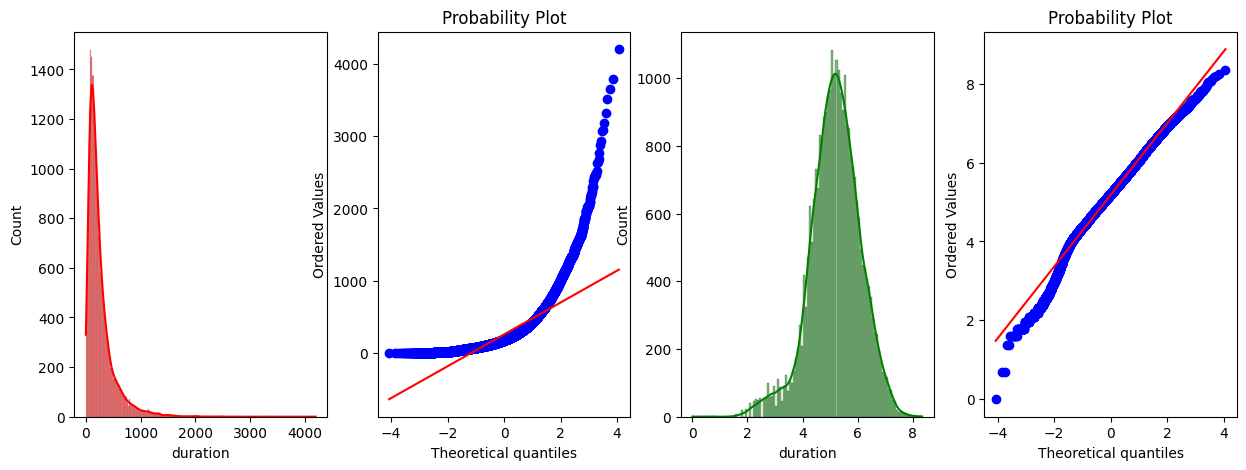

In [26]:
log_transformation(X_train,'duration')

In [27]:
X_train['duration'] = np.log(X_train['duration']+1)
X_test['duration'] = np.log(X_test['duration']+1)

<h2 align="left"><font color='DarkCyan'><u>4. Feature Scaling</u></font></h2>

In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [29]:
columns=['age','campaign','previous','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','emp.var.rate']
X_train[columns] = scaler.fit_transform(X_train[columns]) 
X_test[columns] = scaler.transform(X_test[columns]) 

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 14px;">
    <b>⚙️ Modeling Insights: </b>
    <ul>
        <li> When dealing with outliers in discrete variables, an effective scaling method would be to use Robust Scaling. Robust Scaling is a technique that is less affected by outliers, making it a suitable choice for variables with outliers, including discrete ones.</li>
    </ul>
</div>

<h2 align="left"><font color='DarkCyan'><u>5. Encoding</u></font></h2>

In [30]:
from sklearn.preprocessing import LabelEncoder

# Target Variable Encoding
le = LabelEncoder()
y_train['y'] = le.fit_transform(y_train['y'])
y_test['y'] = le.fit_transform(y_test['y'])

# Default Variable Encoding
X_train['default'] = le.fit_transform(X_train['default'])
X_test['default'] = le.fit_transform(X_test['default'])

In [31]:
# One-Hot Encoding (k-1) Pandas Method
X_train = pd.concat([X_train, pd.get_dummies(X_train[['marital','housing','loan','contact','month','day_of_week']],prefix=['mar','hous','loan','cont','month','day'],drop_first=True, dtype=int)],axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test[['marital','housing','loan','contact','month','day_of_week']],prefix=['mar','hous','loan','cont','month','day'],drop_first=True, dtype=int)], axis=1)

# Now Drop the Original Column 
X_train = X_train.drop(['marital','housing','loan','contact','month','day_of_week'],axis=1)
X_test = X_test.drop(['marital','housing','loan','contact','month','day_of_week'],axis=1)

In [32]:
# Custom mapping function
def custom_mapping(value):
    if value == 999:
        return 0
    else:
        return 1

# Apply the custom mapping function to the 'pdays' column
X_train['pdays'] = X_train['pdays'].apply(custom_mapping)
X_test['pdays'] = X_test['pdays'].apply(custom_mapping)

In [33]:
# Define a custom mapping from job names to salary rank
custom_mapping = {
    'student': 1,        
    'unemployed': 2,    
    'housemaid': 3,
    'retired': 4,
    'blue-collar': 5,
    'services': 6,
    'self-employed': 7, 
    'unknown': 8,      
    'admin.': 9,       
    'technician': 10,   
    'entrepreneur': 11, 
    'management': 12,  
          
}

# Use the map function to apply the custom mapping to the 'job' column
X_train['job'] = X_train['job'].map(custom_mapping)
X_test['job'] = X_test['job'].map(custom_mapping)

In [34]:
# Define a custom mapping from education levels to rank
custom_mapping2 = {
    'illiterate': 1,              # Lowest education level
    'unknown': 2,
    'basic.4y': 3,
    'basic.6y': 4,
    'basic.9y': 5,
    'high.school': 6,
    'professional.course': 7,
    'university.degree': 8     # Highest education level
}

# Use the map function to apply the custom mapping to the 'education' column
X_train['education'] = X_train['education'].map(custom_mapping2)
X_test['education'] = X_test['education'].map(custom_mapping2)

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 14px;">
    <b>⚙️ Modeling Insights:  </b>
    <ul>
        <li> Binary Categorical Variable's - Label Encoding</li>
        <li> Ordinal Encoding - Custom Mapping - in pdays 98% of customers were not contacted hence it was encoded as 0 for no contact and 1 for contact</li>
        <li> Ordinal encoding with custom mapping is applied to the "Job" and "Education" features, as they inherently possess a sense of ranking or hierarchy. </li>
    </ul>
</div>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#0093F9;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-5"></a> 
<p style="padding: 10px;
              color:white;">
              5. Logistic Regression
</p>
</div>

In [15]:
# Essential Libraries
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

<h2 align="left"><font color='DarkCyan'><u>Building Model</u></font></h2>

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define the hyperparameter grid
param_grid = {
    'penalty': ['l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'max_iter': [1000,1500,2000]
}

# Create the Logistic Regression model
log_model = LogisticRegression()

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train.values.ravel())  

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_log_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


In [35]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=10, max_iter= 1000, penalty='l2')
log_model.fit(X_train,y_train.values.ravel())

LogisticRegression(C=10, max_iter=1000)

In [36]:
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

<h2 align="left"><font color='DarkCyan'><u>Model Evaluation</u></font></h2>

<h3 align="left"> <font color='blue'>Classification Report </font></h3>

In [49]:
print(classification_report(y_test,y_test_pred))

print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10976
           1       0.68      0.44      0.53      1377

    accuracy                           0.91     12353
   macro avg       0.81      0.71      0.74     12353
weighted avg       0.90      0.91      0.91     12353

Accuracy train:  0.9105922353675884
Accuracy test:  0.9144337407917105


<h3 align="left"> <font color='blue'>Confusion Matrix</font></h3>

Text(0.5, 23.52222222222222, 'Predicted label')

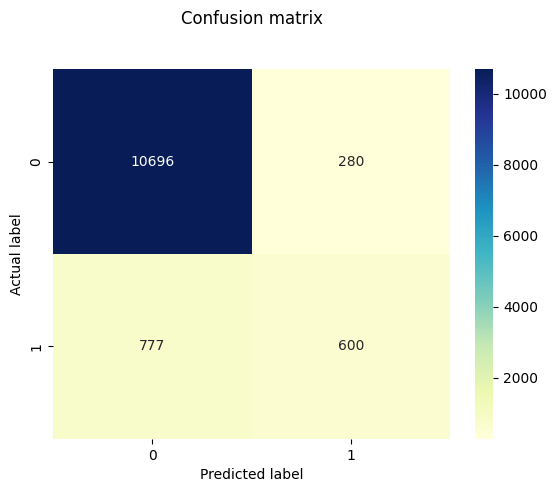

In [63]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3 align="left"> <font color='blue'>ROC-AUC Curve</font></h3>

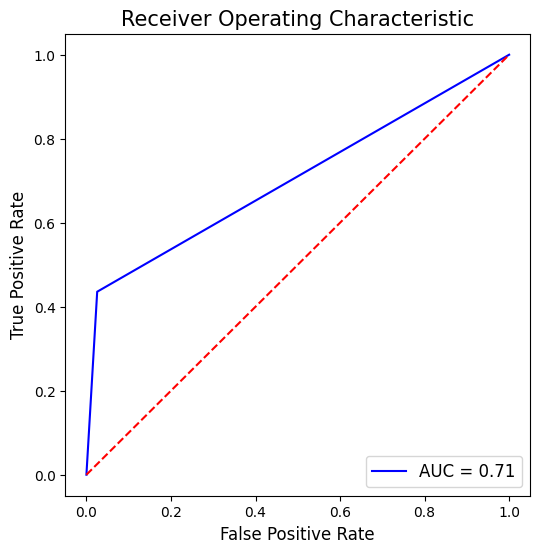

In [64]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, y_test_pred)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=12)
ax.set_xlabel('False Positive Rate',fontsize=12)
ax.legend(loc = 'lower right', prop={'size': 12})

plt.subplots_adjust(wspace=1)

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The model has relatively high accuracy, but it has limitations in correctly identifying subscribers (positive class).However, accuracy alone here will not provide a complete picture of the model's performance, especially in cases of class imbalance.
.</li>
        <li>Precision is relatively lower, which means that when the model predicts a subscription, there is a higher chance of false positives. This may result in unnecessary marketing efforts for customers who wouldn't subscribe.</li>
            <li> In this context, it means that when the model predicts that a customer will subscribe to a term deposit, it is correct about 68% of the time. 
</li>
        <li>The recall for the positive class (1) is approximately 44%.Recall is also relatively lower, indicating that the model is missing a significant portion of potential subscribers. This could result in missed opportunities for the marketing campaign.</li>
           <li> In this case, it suggests that the model is capturing only 44% of the total customers who would potentially subscribe to a term deposit. High recall is important when missing true positives is costly or undesirable.</li>
       <li> An ROC-AUC score of 0.7 indicates that the model can distinguish between the positive and negative classes moderately well. It means that, in general, the model is better than random guessing but may not be highly accurate.</li>
    </ul>
</div>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#0093F9;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-6"></a> 
<p style="padding: 10px;
              color:white;">
              6. K Nearest Neighbor
</p>
</div>

<h2 align="left"><font color='DarkCyan'><u>Building Model</u></font></h2>

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn = KNeighborsClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': list(range(1, 31))
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',verbose=1, n_jobs=-1)

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'n_neighbors': 9}


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=9)

In [43]:
y_train_pred2 = knn.predict(X_train)
y_test_pred2 = knn.predict(X_test)

<h2 align="left"><font color='DarkCyan'><u>Model Evaluation</u></font></h2>

<h3 align="left"> <font color='blue'>Classification Report </font></h3>

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred2))

print("Accuracy train: ", accuracy_score(y_train, y_train_pred2))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10976
           1       0.62      0.31      0.41      1377

    accuracy                           0.90     12353
   macro avg       0.77      0.64      0.68     12353
weighted avg       0.88      0.90      0.89     12353

Accuracy train:  0.9157617180723727
Accuracy test:  0.9017242775034404


<h3 align="left"> <font color='blue'>Confusion Matrix</font></h3>

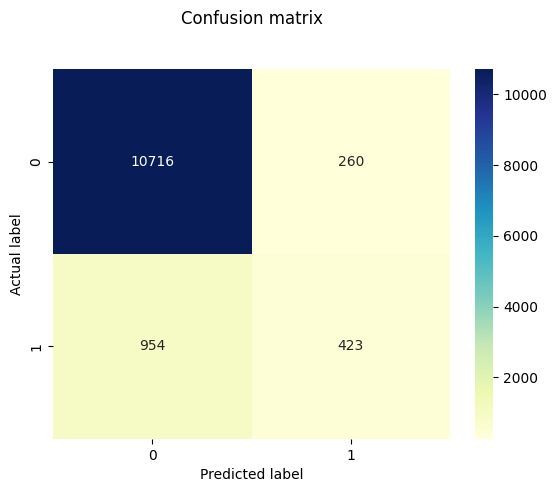

In [70]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred2)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

<h3 align="left"> <font color='blue'>ROC-AUC Curve</font></h3>

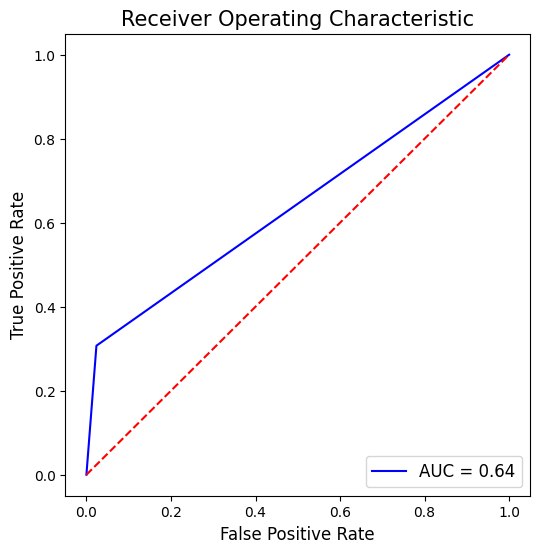

In [71]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, y_test_pred2)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=12)
ax.set_xlabel('False Positive Rate',fontsize=12)
ax.legend(loc = 'lower right', prop={'size': 12})

plt.subplots_adjust(wspace=1)

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 14px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The model has relatively high accuracy, but it has limitations in correctly identifying subscribers (positive class).However, accuracy alone here will not provide a complete picture of the model's performance, especially in cases of class imbalance.
.</li>
        <li>For Class 0 (no subscription), the model has high precision and recall, suggesting it is effective at identifying instances that truly do not result in subscriptions. However, for Class 1 (subscription), the model's precision is lower, indicating that it sometimes makes false-positive predictions. The recall for Class 1 is also relatively low, indicating that the model may miss some potential subscribers..</li>
        <li>The confusion matrix provides a more detailed view of the model's performance. It confirms the trade-off between precision and recall, where the model has high precision for Class 0 but lower recall for Class 1.</li>
       <li>The ROC-AUC score is 0.64, which suggests that the model has a moderate ability to discriminate between the two classes. While it's better than random guessing, there is still room for improvement.</li>
    </ul>
</div>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#0093F9;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-7"></a> 
<p style="padding: 10px;
              color:white;">
              7. Results and Discussion 📈✔️
</p>
</div>

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>Result and Discussion:</b>
    <ul>
<li>Both models exhibit strengths and trade-offs. Logistic Regression outperforms KNN in terms of precision, recall, F1-Score, and ROC-AUC, particularly for Class 1 (subscription).</li>
            
<li>Logistic Regression is better at capturing potential subscribers, which might be desirable in a marketing campaign context where identifying potential customers is essential.</li>
           <li> The choice between these models should depend on the specific goals of your marketing campaign. If capturing more subscribers is a priority, Logistic Regression appears to be the better choice. It offers a better balance between precision and recall for Class 1.</li>
            
<li>Additionally, Logistic Regression's higher ROC-AUC indicates better overall discriminative power between the two classes.</li>
    </ul>
</div>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#0093F9;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-8"></a> 
<p style="padding: 10px;
              color:white;">
              8. Way Forward 📌
</p>
</div>

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 14px;">
    <b>⚙️ Modeling Insights: </b>
    <ul>
        <li>Addressing class imbalance in the target variable. Methods: Resampling, Synthetic Data Generation, Ensemble Techniques. </li>
        <li>Exploring the reasons behind KNN's lower performance in comparison to Logistic Regression.</li>
        <li>Primary focus on feature selection using Chi-squared and Mutual Information Gain, with embedded methods like Decision Tree and Random Forest feature importance. </li>
        <li>Implementing advanced algorithms with minimal data preprocessing: Decision Tree, Random Forest, Ada Boost, Gradient Boost, and XG Boost.</li>
    </ul>
</div>